### Game Plan
- Import necessary Libraries & Data inspection
- Data Cleaning - Treating null values, Imputation values
- Data Preparation - Determining High value customers & Churn Target
- Exploratory Data Analysis
    - Univariate Analysis
    - Bi-variate Analysis
- Modelling
    - Interpretable Model
        - Logistic Regression with RFE
    - Perform Dimensionality reduction Using PCA
    - High Performance Models
        - Logistic Regression with PCA
        - Decision Tree with PCA
        - Random Forest with PCA
- Results, Conclusions & Recommendations

# 1. Import Libraries & Inspect Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.options.display.float_format = "{:,.2f}".format

# Libraries for model build
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries for Performance
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn = pd.read_csv("telecom_churn_data.csv")
churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6  arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
0            6/30/2014  197.38          nan           nan            nan   
1            6/30/2014   34.05        24.11         15.74           0.00   
2            6/30/2014  167.69        11.54        143.33           0.00   
3            6/30/2014  221.34        99.91        123.31           0.00   
4            6/30/2014  261.64        50.31         76.96           0.00   

   loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0               nan               nan               nan               nan   
1             23.88             11.51              0.00              0.00   
2              7.19             29.34             24.11              0.00   
3             73.68            107.43              1.91              0.00   
4             50.31             67.64              0.00              0.00   

   loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0           nan               nan               nan               nan   
1         35.39              0.23              0.00              0.00   
2         60.66              4.34             41.81              1.48   
3        183.03             26.23              2.99              0.00   
4        117.96              0.00              9.31              0.00   

   std_og_t2c_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  \
0               nan           nan           nan           nan          nan   
1              0.00          0.23          0.00          4.68         0.00   
2              0.00         47.64          0.00         46.56         0.45   
3              0.00         29.23          0.00         10.96         0.00   
4              0.00          9.31          0.00          0.00         0.00   

   total_og_mou_6  roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  \
0            0.00            nan               nan               nan   
1           40.31           0.00              1.61             17.48   
2          155.33           0.00            115.69             14.38   
3          223.23           0.00             62.08            113.96   
4          127.28           0.00            105.68            106.84   

   loc_ic_t2f_mou_6  loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  \
0               nan           nan               nan               nan   
1              0.00         19.09              0.00              5.90   
2             99.48        229.56             72.41             45.18   
3             57.43        233.48             43.48              1.33   
4              1.50        214.03              0.00              1.93   

   std_ic_t2f_mou_6  std_ic_t2o_mou_6  std_ic_mou_6  spl_ic_mou_6  \
0               nan               nan           nan           nan   
1              0.00              0.00          5.90          0.00   
2             21.73              0.00        139.33          0.21   
3              1.18              0.00         45.99          0.59   
4              0.00              0.00          1.93          0.00   

   isd_ic_mou_6  ic_others_6  total_ic_mou_6  total_rech_data_6  \
0           nan          nan            0.00               1.00   
1          1.83         0.00           26.83                nan   
2          0.00         0.93          370.04                nan   
3          0.00         0.00          280.08                nan   
4          0.00         0.48          216.44               1.00   

   total_r

In [3]:
churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   arpu_6                    99999 non-null  float64
 7   onnet_mou_6               96062 non-null  float64
 8   offnet_mou_6              96062 non-null  float64
 9   roam_og_mou_6             96062 non-null  float64
 10  loc_og_t2t_mou_6          96062 non-null  float64
 11  loc_og_t2m_mou_6          96062 non-null  float64
 12  loc_og_t2f_mou_6          96062 non-null  float64
 13  loc_og_t2c_mou_6          96062 non-null  float64
 14  loc_o

In [4]:
churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count        99,999.00  99,999.00       98,981.00       98,981.00   
mean  7,001,207,270.39     109.00            0.00            0.00   
std         695,669.39       0.00            0.00            0.00   
min   7,000,000,074.00     109.00            0.00            0.00   
25%   7,000,606,232.50     109.00            0.00            0.00   
50%   7,001,204,632.00     109.00            0.00            0.00   
75%   7,001,812,030.50     109.00            0.00            0.00   
max   7,002,410,905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou    arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
count       98,981.00 99,999.00    96,062.00     96,062.00      96,062.00   
mean             0.00    282.99       132.40        197.94          13.91   
std              0.00    328.44       297.21        316.85          71.44   
min              0.00 -2,258.71         0.00          0.00           0.00   
25%              0.00     93.41         7.38         34.73           0.00   
50%              0.00    197.70        34.31         96.31           0.00   
75%              0.00    371.06       118.74        231.86           0.00   
max              0.00 27,731.09     7,376.71      8,362.36       3,775.11   

       loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
count         96,062.00         96,062.00         96,062.00         96,062.00   
mean              47.10             93.34              3.75              1.12   
std              150.86            162.78             14.23              5.45   
min                0.00              0.00              0.00              0.00   
25%                1.66              9.88              0.00              0.00   
50%               11.91             41.03              0.00              0.00   
75%               40.96            110.39              2.08              0.00   
max            6,431.33          4,729.74          1,466.03            342.86   

       loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
count     96,062.00         96,062.00         96,062.00         96,062.00   
mean         144.20             79.83             87.30              1.13   
std          251.75            252.48            255.62              7.98   
min            0.00              0.00              0.00              0.00   
25%           17.11              0.00              0.00              0.00   
50%           65.11              0.00              3.95              0.00   
75%          168.27             30.81             53.29              0.00   
max       10,643.38          7,366.58          8,314.76            628.56   

       std_og_t2c_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  \
count         96,062.00     96,062.00     96,062.00     96,062.00   
mean               0.00        168.26          0.80          3.92   
std                0.00        389.95         25.77         14.94   
min                0.00          0.00          0.00          0.00   
25%                0.00          0.00          0.00          0.00   
50%                0.00         11.64          0.00          0.00   
75%                0.00        144.84          0.00          2.43   
max                0.00      8,432.99      5,900.66      1,023.21   

       og_others_6  total_og_mou_6  roam_ic_mou_6  loc_ic_t2t_mou_6  \
count    96,062.00       99,999.00      96,062.00         96,062.00   
mean          0.45          305.13           9.95             47.92   
std           4.13          463.42          72.83            140.26   
min           0.00            0.00           0.00              0.00   
25%           0.00           44.74           0.00              2.99   
50%           0.00          145.14           0.00             15.69   
75%           0.00          372.86           0.00             46.84   
max         800.89       10,674.03      13,724.38          6,626.93   

       

In [5]:
# length of data
print(len(churn))

99999


In [6]:
churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'arpu_6', 'onnet_mou_6',
       'offnet_mou_6', 'roam_og_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

## 2. Data Cleaning

In [7]:
# Null Percentage
(churn.isnull().mean()*100).round(2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
arpu_6                      0.00
onnet_mou_6                 3.94
offnet_mou_6                3.94
roam_og_mou_6               3.94
loc_og_t2t_mou_6            3.94
loc_og_t2m_mou_6            3.94
loc_og_t2f_mou_6            3.94
loc_og_t2c_mou_6            3.94
loc_og_mou_6                3.94
std_og_t2t_mou_6            3.94
std_og_t2m_mou_6            3.94
std_og_t2f_mou_6            3.94
std_og_t2c_mou_6            3.94
std_og_mou_6                3.94
isd_og_mou_6                3.94
spl_og_mou_6                3.94
og_others_6                 3.94
total_og_mou_6              0.00
roam_ic_mou_6               3.94
loc_ic_t2t_mou_6            3.94
loc_ic_t2m_mou_6            3.94
loc_ic_t2f_mou_6            3.94
loc_ic_mou_6                3.94
std_ic_t2t_mou_6            3.94
std_ic_t2m

In [8]:
churn.shape

(99999, 226)

#### 1. Lets Remove columns with redundant information - doesnt help in modelling

In [9]:
unique = churn.nunique()
unique = unique[unique.values == 1]
churn.drop(labels = list(unique.index), axis =1, inplace=True)
print("After dropping columns with same values in telecom churn data we are left with",churn.shape ,"rows & columns.")

After dropping columns with same values in telecom churn data we are left with (99999, 210) rows & columns.


In [10]:
### columns that had redundant values
print(list(unique.index))

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'std_og_t2c_mou_6', 'std_ic_t2o_mou_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [11]:
# Null Percentage
(churn.isnull().mean()*100).round(2)

mobile_number               0.00
arpu_6                      0.00
onnet_mou_6                 3.94
offnet_mou_6                3.94
roam_og_mou_6               3.94
loc_og_t2t_mou_6            3.94
loc_og_t2m_mou_6            3.94
loc_og_t2f_mou_6            3.94
loc_og_t2c_mou_6            3.94
loc_og_mou_6                3.94
std_og_t2t_mou_6            3.94
std_og_t2m_mou_6            3.94
std_og_t2f_mou_6            3.94
std_og_mou_6                3.94
isd_og_mou_6                3.94
spl_og_mou_6                3.94
og_others_6                 3.94
total_og_mou_6              0.00
roam_ic_mou_6               3.94
loc_ic_t2t_mou_6            3.94
loc_ic_t2m_mou_6            3.94
loc_ic_t2f_mou_6            3.94
loc_ic_mou_6                3.94
std_ic_t2t_mou_6            3.94
std_ic_t2m_mou_6            3.94
std_ic_t2f_mou_6            3.94
std_ic_mou_6                3.94
spl_ic_mou_6                3.94
isd_ic_mou_6                3.94
ic_others_6                 3.94
total_ic_m

#### We have many attributes with high null percentage but before dropping them lets try to impute missing values whereever possible. Les start with data missing not at random (MNAR) - meaningful missing data

In [12]:
#### Lets Examine total outgoing & incoming minutes of usage
churn[churn['total_og_mou_6']==0].head()

mobile_number  arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
0      7000842753  197.38          nan           nan            nan   
15     7002070365   31.00          nan           nan            nan   
26     7000335166    0.01          nan           nan            nan   
30     7001103524    0.70         0.00          1.18           1.18   
33     7000149764  977.02         0.00          0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0                nan               nan               nan               nan   
15               nan               nan               nan               nan   
26               nan               nan               nan               nan   
30              0.00              0.00              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0            nan               nan               nan               nan   
15           nan               nan               nan               nan   
26           nan               nan               nan               nan   
30          0.00              0.00              0.00              0.00   
33          0.00              0.00              0.00              0.00   

    std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
0            nan           nan           nan          nan            0.00   
15           nan           nan           nan          nan            0.00   
26           nan           nan           nan          nan            0.00   
30          0.00          0.00          0.00         0.00            0.00   
33          0.00          0.00          0.00         0.00            0.00   

    roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0             nan               nan               nan               nan   
15            nan               nan               nan               nan   
26            nan               nan               nan               nan   
30          14.01              0.00              0.00              0.00   
33           0.00              1.75              0.00              1.73   

    loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0            nan               nan               nan               nan   
15           nan               nan               nan               nan   
26           nan               nan               nan               nan   
30          0.00              0.00              0.00              0.00   
33          3.48              0.00              2.95              0.23   

    std_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
0            nan           nan           nan          nan            0.00   
15           nan           nan           nan          nan            0.00   
26           nan           nan           nan          nan            0.00   
30          0.00          0.00          0.00         0.00            0.00   
33          3.18          0.00          0.00         1.23            7.89   

    total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
0                1.00                 4               362             252   
15                nan                 1                 0               0   
26                nan                 0                 0               0   
30                nan                 3                 0               0   
33               5.00                 7              1058             252   

    last_day_rch_amt_6 date_of_last_rech_6  max_rech_data_6  count_rech_2g_6  \
0                  252           6/21/2014           252.00             0.00   
15                   0           6/14/2014              nan              nan   
26                   0                 NaN              nan              nan   
30                   0           6/26/2014              na

In [13]:
churn[churn['total_ic_mou_6']==0].head()

mobile_number  arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
0      7000842753  197.38          nan           nan            nan   
15     7002070365   31.00          nan           nan            nan   
26     7000335166    0.01          nan           nan            nan   
30     7001103524    0.70         0.00          1.18           1.18   
37     7001551667    0.00          nan           nan            nan   

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0                nan               nan               nan               nan   
15               nan               nan               nan               nan   
26               nan               nan               nan               nan   
30              0.00              0.00              0.00              0.00   
37               nan               nan               nan               nan   

    loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0            nan               nan               nan               nan   
15           nan               nan               nan               nan   
26           nan               nan               nan               nan   
30          0.00              0.00              0.00              0.00   
37           nan               nan               nan               nan   

    std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
0            nan           nan           nan          nan            0.00   
15           nan           nan           nan          nan            0.00   
26           nan           nan           nan          nan            0.00   
30          0.00          0.00          0.00         0.00            0.00   
37           nan           nan           nan          nan            0.00   

    roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0             nan               nan               nan               nan   
15            nan               nan               nan               nan   
26            nan               nan               nan               nan   
30          14.01              0.00              0.00              0.00   
37            nan               nan               nan               nan   

    loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0            nan               nan               nan               nan   
15           nan               nan               nan               nan   
26           nan               nan               nan               nan   
30          0.00              0.00              0.00              0.00   
37           nan               nan               nan               nan   

    std_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
0            nan           nan           nan          nan            0.00   
15           nan           nan           nan          nan            0.00   
26           nan           nan           nan          nan            0.00   
30          0.00          0.00          0.00         0.00            0.00   
37           nan           nan           nan          nan            0.00   

    total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
0                1.00                 4               362             252   
15                nan                 1                 0               0   
26                nan                 0                 0               0   
30                nan                 3                 0               0   
37                nan                 2                 0               0   

    last_day_rch_amt_6 date_of_last_rech_6  max_rech_data_6  count_rech_2g_6  \
0                  252           6/21/2014           252.00             0.00   
15                   0           6/14/2014              nan              nan   
26                   0                 NaN              nan              nan   
30                   0           6/26/2014              na

#### 2. We observe that when 'Total Incoming/Outgoing - MoU is 0 - Local, ISD & Special category outgoing calls are 0 - Rightl so'. Hence we can impute these values with Zero safely

#### Observations
1. We observe that when 'Total outgoing MoU is 0 - Local, ISD & Special category outgoing calls are 0 or null - Rightly so'. Hence we can impute these values with Zero safely
2. Further we observe that loc_og_t2t_mou + loc_og_t2m_mou +loc_og_t2f_mou + loc_og_t2c_mou = loc_og_mou
3. std_og_t2t_mou + std_og_t2m_mou +std_og_t2f_mou = std_og_mou
4. loc_og_mou + std_og_mou + isd_og_mou + spl_og_mou + og_others = total_og_mou


In [14]:
print(len(churn[churn['total_og_mou_6']==0]))

print(len(churn[churn['total_ic_mou_6']==0]))


10055
8433


In [15]:
print(len(churn[churn['total_og_mou_6'].isnull()]))

0


In [16]:
Months_with_zero_usage = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']

In [17]:
# Imputing missing values based on Zero Consumption for Month of June
churn.loc[(churn.total_og_mou_6 == 0),['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6',
                                      'std_og_mou_6', 'std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6',
                                      'loc_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6',
                                      'loc_og_t2c_mou_6']] = 0

churn.loc[(churn.total_ic_mou_6 == 0),['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','ic_others_6',
                                      'std_ic_mou_6', 'std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6',
                                      'loc_ic_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']] = 0

# Imputing missing values based on Zero Consumption for Month of July
churn.loc[(churn.total_og_mou_7 == 0),['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7',
                                      'std_og_mou_7', 'std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7',
                                       'loc_og_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7',
                                     'loc_og_t2c_mou_7']] = 0

churn.loc[(churn.total_ic_mou_7 == 0),['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','spl_ic_mou_7','ic_others_7',
                                      'std_ic_mou_7', 'std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7',
                                      'loc_ic_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7']] = 0

# Imputing missing values based on Zero Consumption for Month of Aug
churn.loc[(churn.total_og_mou_8 == 0),['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8',
                                      'std_og_mou_8', 'std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8',
                                       'loc_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8',
                                     'loc_og_t2c_mou_8']] = 0

churn.loc[(churn.total_ic_mou_8 == 0),['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','spl_ic_mou_8','ic_others_8',
                                      'std_ic_mou_8', 'std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8',
                                      'loc_ic_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8']] = 0

# Imputing missing values based on Zero Consumption for Month of Sept
churn.loc[(churn.total_og_mou_9 == 0),['loc_og_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9',
                                      'std_og_mou_9', 'std_og_t2t_mou_9','std_og_t2m_mou_9','std_og_t2f_mou_9',
                                       'loc_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9',
                                     'loc_og_t2c_mou_9']] = 0

churn.loc[(churn.total_ic_mou_9 == 0),['loc_ic_mou_9','std_ic_mou_9','isd_ic_mou_9','spl_ic_mou_9','ic_others_9',
                                      'std_ic_mou_9', 'std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9',
                                      'loc_ic_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9']] = 0


churn[churn['total_og_mou_6']==0].head()

mobile_number  arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
0      7000842753  197.38          nan           nan            nan   
15     7002070365   31.00          nan           nan            nan   
26     7000335166    0.01          nan           nan            nan   
30     7001103524    0.70         0.00          1.18           1.18   
33     7000149764  977.02         0.00          0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0               0.00              0.00              0.00              0.00   
15              0.00              0.00              0.00              0.00   
26              0.00              0.00              0.00              0.00   
30              0.00              0.00              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0           0.00              0.00              0.00              0.00   
15          0.00              0.00              0.00              0.00   
26          0.00              0.00              0.00              0.00   
30          0.00              0.00              0.00              0.00   
33          0.00              0.00              0.00              0.00   

    std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
0           0.00          0.00          0.00         0.00            0.00   
15          0.00          0.00          0.00         0.00            0.00   
26          0.00          0.00          0.00         0.00            0.00   
30          0.00          0.00          0.00         0.00            0.00   
33          0.00          0.00          0.00         0.00            0.00   

    roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0             nan              0.00              0.00              0.00   
15            nan              0.00              0.00              0.00   
26            nan              0.00              0.00              0.00   
30          14.01              0.00              0.00              0.00   
33           0.00              1.75              0.00              1.73   

    loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0           0.00              0.00              0.00              0.00   
15          0.00              0.00              0.00              0.00   
26          0.00              0.00              0.00              0.00   
30          0.00              0.00              0.00              0.00   
33          3.48              0.00              2.95              0.23   

    std_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
0           0.00          0.00          0.00         0.00            0.00   
15          0.00          0.00          0.00         0.00            0.00   
26          0.00          0.00          0.00         0.00            0.00   
30          0.00          0.00          0.00         0.00            0.00   
33          3.18          0.00          0.00         1.23            7.89   

    total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
0                1.00                 4               362             252   
15                nan                 1                 0               0   
26                nan                 0                 0               0   
30                nan                 3                 0               0   
33               5.00                 7              1058             252   

    last_day_rch_amt_6 date_of_last_rech_6  max_rech_data_6  count_rech_2g_6  \
0                  252           6/21/2014           252.00             0.00   
15                   0           6/14/2014              nan              nan   
26                   0                 NaN              nan              nan   
30                   0           6/26/2014              na

In [18]:
(churn.isnull().mean()*100).round(2)

mobile_number               0.00
arpu_6                      0.00
onnet_mou_6                 3.94
offnet_mou_6                3.94
roam_og_mou_6               3.94
loc_og_t2t_mou_6            0.00
loc_og_t2m_mou_6            0.00
loc_og_t2f_mou_6            0.00
loc_og_t2c_mou_6            0.00
loc_og_mou_6                0.00
std_og_t2t_mou_6            0.00
std_og_t2m_mou_6            0.00
std_og_t2f_mou_6            0.00
std_og_mou_6                0.00
isd_og_mou_6                0.00
spl_og_mou_6                0.00
og_others_6                 0.00
total_og_mou_6              0.00
roam_ic_mou_6               3.94
loc_ic_t2t_mou_6            0.00
loc_ic_t2m_mou_6            0.00
loc_ic_t2f_mou_6            0.00
loc_ic_mou_6                0.00
std_ic_t2t_mou_6            0.00
std_ic_t2m_mou_6            0.00
std_ic_t2f_mou_6            0.00
std_ic_mou_6                0.00
spl_ic_mou_6                0.00
isd_ic_mou_6                0.00
ic_others_6                 0.00
total_ic_m

#### 3. We Observe that when the 'total data recharge' value is null or recharge date for data is not available for a particular month is missing - It clearly means that there was no data recharge done & hence following attributes will be Zero -  total_rech_data_6, max_rech_data_6, count_rech_2g_6, count_rech_3g_6, av_rech_amt_data_6, vol_2g_mb_6, arpu_2g_6, vol_3g_mb_6, arpu_3g_6, night_pck_user_6 & date_of_last_rech_6 could be set to distinct high value

In [19]:
churn[churn['date_of_last_rech_data_6'].isnull()].head()

mobile_number  arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
1     7001865778   34.05        24.11         15.74           0.00   
2     7001625959  167.69        11.54        143.33           0.00   
3     7001204172  221.34        99.91        123.31           0.00   
5     7000286308   50.26        50.16         19.28           0.00   
6     7001051193  429.02        71.03        262.73           0.00   

   loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
1             23.88             11.51              0.00              0.00   
2              7.19             29.34             24.11              0.00   
3             73.68            107.43              1.91              0.00   
5             50.16             16.39              0.00              0.00   
6             71.03            252.23             10.38              0.11   

   loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
1         35.39              0.23              0.00              0.00   
2         60.66              4.34             41.81              1.48   
3        183.03             26.23              2.99              0.00   
5         66.56              0.00              0.00              2.88   
6        333.64              0.00              0.00              0.00   

   std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
1          0.23          0.00          4.68         0.00           40.31   
2         47.64          0.00         46.56         0.45          155.33   
3         29.23          0.00         10.96         0.00          223.23   
5          2.88          0.00          0.00         0.00           69.44   
6          0.00          0.00          0.11         0.00          333.76   

   roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
1           0.00              1.61             17.48              0.00   
2           0.00            115.69             14.38             99.48   
3           0.00             62.08            113.96             57.43   
5           0.00             28.73             49.19              0.00   
6           0.00          1,857.99            248.64             20.24   

   loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
1         19.09              0.00              5.90              0.00   
2        229.56             72.41             45.18             21.73   
3        233.48             43.48              1.33              1.18   
5         77.93              0.00              0.00             77.03   
6      2,126.89              0.00              1.39              0.00   

   std_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
1          5.90          0.00          1.83         0.00           26.83   
2        139.33          0.21          0.00         0.93          370.04   
3         45.99          0.59          0.00         0.00          280.08   
5         77.03          0.43          0.00         0.00          155.39   
6          1.39          0.00          0.00         0.11        2,128.41   

   total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
1                nan                 4                74              44   
2                nan                 5               168              86   
3                nan                10               230              60   
5                nan                 2               120             120   
6                nan                15               499              90   

   last_day_rch_amt_6 date_of_last_rech_6  max_rech_data_6  count_rech_2g_6  \
1                  44           6/29/2014              nan              nan   
2                   0           6/17/2014              nan              nan   
3                  30           6/28/2014              nan              nan   
5                 120           6/19/2014              nan              nan   
6                  37         

In [20]:
# Imputing missing values based on Zero Data Consumption for Month of June
churn.loc[(churn['total_rech_data_6'].isnull()),['total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6',
                                                 'av_rech_amt_data_6','vol_2g_mb_6','arpu_2g_6','vol_3g_mb_6','arpu_3g_6']] = 0

# Impute Categorical Variables with Special value for distinction(no data recharge)
churn.loc[(churn['total_rech_data_6'].isnull()),['night_pck_user_6','fb_user_6']] = -1

# set a max date for case of no data recharge
churn['date_of_last_rech_data_6'].fillna(value = '12/31/2014', inplace = True)

#------------------------------------------------------------------------------------------------------------

# Imputing missing values based on Zero Data Consumption for Month of July
churn.loc[(churn['total_rech_data_7'].isnull()),['total_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7',
                                            'av_rech_amt_data_7','vol_2g_mb_7', 'arpu_2g_7', 'vol_3g_mb_7', 'arpu_3g_7']] = 0

# Impute Categorical Variables with Special value for distinction(no data recharge)
churn.loc[(churn['total_rech_data_7'].isnull()),['night_pck_user_7','fb_user_7']] = -1

# set a max date for case of no data recharge
churn['date_of_last_rech_data_7'].fillna(value = '12/31/2014', inplace = True)

#------------------------------------------------------------------------------------------------------------

# Imputing missing values based on Zero Data Consumption for Month of Aug
churn.loc[(churn['total_rech_data_8'].isnull()),['total_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8',
                                                'av_rech_amt_data_8','vol_2g_mb_8','arpu_2g_8','vol_3g_mb_8','arpu_3g_8']] = 0

# Impute Categorical Variables with Special value for distinction(no data recharge)
churn.loc[(churn['total_rech_data_8'].isnull()),['night_pck_user_8','fb_user_8']] = -1

# set a max date for case of no data recharge
churn['date_of_last_rech_data_8'].fillna(value = '12/31/2014', inplace = True)

#-----------------------------------------------------------------------------------------------------------

# Imputing missing values based on Zero Data Consumption for Month of Sept
churn.loc[(churn['total_rech_data_9'].isnull()),['total_rech_data_9','max_rech_data_9','count_rech_2g_9','count_rech_3g_9',
                                                'av_rech_amt_data_9','vol_2g_mb_9','arpu_2g_9','vol_3g_mb_9','arpu_3g_9']] = 0

# Impute Categorical Variables with Special value for distinction (no data recharge)
churn.loc[(churn['total_rech_data_9'].isnull()),['night_pck_user_9','fb_user_9']] = -1

# set a max date for case of no data recharge
churn['date_of_last_rech_data_9'].fillna(value = '12/31/2014', inplace = True)

In [21]:
(churn.isnull().mean()*100).round(2)

mobile_number               0.00
arpu_6                      0.00
onnet_mou_6                 3.94
offnet_mou_6                3.94
roam_og_mou_6               3.94
loc_og_t2t_mou_6            0.00
loc_og_t2m_mou_6            0.00
loc_og_t2f_mou_6            0.00
loc_og_t2c_mou_6            0.00
loc_og_mou_6                0.00
std_og_t2t_mou_6            0.00
std_og_t2m_mou_6            0.00
std_og_t2f_mou_6            0.00
std_og_mou_6                0.00
isd_og_mou_6                0.00
spl_og_mou_6                0.00
og_others_6                 0.00
total_og_mou_6              0.00
roam_ic_mou_6               3.94
loc_ic_t2t_mou_6            0.00
loc_ic_t2m_mou_6            0.00
loc_ic_t2f_mou_6            0.00
loc_ic_mou_6                0.00
std_ic_t2t_mou_6            0.00
std_ic_t2m_mou_6            0.00
std_ic_t2f_mou_6            0.00
std_ic_mou_6                0.00
spl_ic_mou_6                0.00
isd_ic_mou_6                0.00
ic_others_6                 0.00
total_ic_m

#### 4. We Observe that when total outgoing and incoming MoU for particular month is Zero, offnet, onnet & roaming values are Null. These must be Zero as there is no MoU

In [22]:
no_mou_filter_6 = (churn['total_og_mou_6'] == 0) & (churn['total_ic_mou_6'] == 0)
no_mou_filter_7 = (churn['total_og_mou_7'] == 0) & (churn['total_ic_mou_7'] == 0)
no_mou_filter_8 = (churn['total_og_mou_8'] == 0) & (churn['total_ic_mou_8'] == 0)
no_mou_filter_9 = (churn['total_og_mou_9'] == 0) & (churn['total_ic_mou_9'] == 0)

churn.loc[no_mou_filter_6, ['onnet_mou_6','offnet_mou_6','roam_og_mou_6','roam_ic_mou_6']] = 0
churn.loc[no_mou_filter_7, ['onnet_mou_7','offnet_mou_7','roam_og_mou_7','roam_ic_mou_7']] = 0
churn.loc[no_mou_filter_8, ['onnet_mou_8','offnet_mou_8','roam_og_mou_8','roam_ic_mou_8']] = 0
churn.loc[no_mou_filter_9, ['onnet_mou_9','offnet_mou_9','roam_og_mou_9','roam_ic_mou_9']] = 0

In [23]:
(churn.isnull().mean()*100).round(2)

mobile_number               0.00
arpu_6                      0.00
onnet_mou_6                 0.00
offnet_mou_6                0.00
roam_og_mou_6               0.00
loc_og_t2t_mou_6            0.00
loc_og_t2m_mou_6            0.00
loc_og_t2f_mou_6            0.00
loc_og_t2c_mou_6            0.00
loc_og_mou_6                0.00
std_og_t2t_mou_6            0.00
std_og_t2m_mou_6            0.00
std_og_t2f_mou_6            0.00
std_og_mou_6                0.00
isd_og_mou_6                0.00
spl_og_mou_6                0.00
og_others_6                 0.00
total_og_mou_6              0.00
roam_ic_mou_6               0.00
loc_ic_t2t_mou_6            0.00
loc_ic_t2m_mou_6            0.00
loc_ic_t2f_mou_6            0.00
loc_ic_mou_6                0.00
std_ic_t2t_mou_6            0.00
std_ic_t2m_mou_6            0.00
std_ic_t2f_mou_6            0.00
std_ic_mou_6                0.00
spl_ic_mou_6                0.00
isd_ic_mou_6                0.00
ic_others_6                 0.00
total_ic_m

In [24]:
churn[churn['date_of_last_rech_6'].isnull()].head()

mobile_number  arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
26      7000335166    0.01         0.00          0.00           0.00   
91      7000160837    4.00         0.00          0.00           0.00   
187     7000375019   37.50        11.71          7.11           0.00   
198     7002122258   17.60        42.51          0.00           0.00   
232     7000621478    0.70         0.00          0.00           0.00   

     loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
26               0.00              0.00              0.00              0.00   
91               0.00              0.00              0.00              0.00   
187             11.71              6.14              0.96              0.00   
198              0.00              0.00              0.00              0.00   
232              0.00              0.00              0.00              0.00   

     loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
26           0.00              0.00              0.00              0.00   
91           0.00              0.00              0.00              0.00   
187         18.83              0.00              0.00              0.00   
198          0.00             42.51              0.00              0.00   
232          0.00              0.00              0.00              0.00   

     std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
26           0.00          0.00          0.00         0.00            0.00   
91           0.00          0.00          0.00         0.00            0.00   
187          0.00          0.00          0.00         0.00           18.83   
198         42.51          0.00          0.00         0.00           42.51   
232          0.00          0.00          0.00         0.00            0.00   

     roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
26            0.00              0.00              0.00              0.00   
91            0.00             11.24            145.13              1.26   
187           0.00             47.01              8.06              0.13   
198           0.00              0.00              0.00              0.00   
232           0.00              0.00              0.00              0.00   

     loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
26           0.00              0.00              0.00              0.00   
91         157.64              0.00              3.85              0.00   
187         55.21              0.00              0.00              0.00   
198          0.00              0.00              0.00              0.00   
232          0.00              0.00              0.00              0.00   

     std_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
26           0.00          0.00          0.00         0.00            0.00   
91           3.85          0.00          0.00         0.00          161.49   
187          0.00          0.26          0.00         0.00           55.48   
198          0.00          0.00          0.00         0.00            0.00   
232          0.00          0.00          0.00         0.00            0.00   

     total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
26                0.00                 0                 0               0   
91                0.00                 0                 0               0   
187               0.00                 0                 0               0   
198               0.00                 0                 0               0   
232               0.00                 0                 0               0   

     last_day_rch_amt_6 date_of_last_rech_6  max_rech_data_6  count_rech_2g_6  \
26                    0                 NaN             0.00             0.00   
91                    0                 NaN             0.00             0.00   
187                   0                 NaN             0.00             0.00   
198    

#### 5. We are left with Null values in 'date_of_last_rech' columns, all these records pertain to no recharge cases - hence lets impute the values with dummy high categorical value for distinction

In [25]:
# set a max date for case of no recharge
churn['date_of_last_rech_6'].fillna(value = '12/31/2014', inplace = True)
churn['date_of_last_rech_7'].fillna(value = '12/31/2014', inplace = True)
churn['date_of_last_rech_8'].fillna(value = '12/31/2014', inplace = True)
churn['date_of_last_rech_9'].fillna(value = '12/31/2014', inplace = True)

In [26]:
(churn.isnull().mean()*100).round(2)

mobile_number               0.00
arpu_6                      0.00
onnet_mou_6                 0.00
offnet_mou_6                0.00
roam_og_mou_6               0.00
loc_og_t2t_mou_6            0.00
loc_og_t2m_mou_6            0.00
loc_og_t2f_mou_6            0.00
loc_og_t2c_mou_6            0.00
loc_og_mou_6                0.00
std_og_t2t_mou_6            0.00
std_og_t2m_mou_6            0.00
std_og_t2f_mou_6            0.00
std_og_mou_6                0.00
isd_og_mou_6                0.00
spl_og_mou_6                0.00
og_others_6                 0.00
total_og_mou_6              0.00
roam_ic_mou_6               0.00
loc_ic_t2t_mou_6            0.00
loc_ic_t2m_mou_6            0.00
loc_ic_t2f_mou_6            0.00
loc_ic_mou_6                0.00
std_ic_t2t_mou_6            0.00
std_ic_t2m_mou_6            0.00
std_ic_t2f_mou_6            0.00
std_ic_mou_6                0.00
spl_ic_mou_6                0.00
isd_ic_mou_6                0.00
ic_others_6                 0.00
total_ic_m

## 3. Data Preparation

In [27]:
# Data Preparation

# Create an attribute good phase recharge amount to identify clients we care about

churn['good_phase_rech_data_amt'] = (churn.total_rech_data_6*churn.av_rech_amt_data_6)+(churn.total_rech_data_7*churn.av_rech_amt_data_7)
churn['good_phase_rech_amt'] = churn['total_rech_amt_6']+ churn['total_rech_amt_7']
churn['total_good_phase_rech_amt'] = (churn['good_phase_rech_data_amt'] + churn['good_phase_rech_amt'])/2
churn.head()

mobile_number  arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
0     7000842753  197.38         0.00          0.00           0.00   
1     7001865778   34.05        24.11         15.74           0.00   
2     7001625959  167.69        11.54        143.33           0.00   
3     7001204172  221.34        99.91        123.31           0.00   
4     7000142493  261.64        50.31         76.96           0.00   

   loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
1             23.88             11.51              0.00              0.00   
2              7.19             29.34             24.11              0.00   
3             73.68            107.43              1.91              0.00   
4             50.31             67.64              0.00              0.00   

   loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0          0.00              0.00              0.00              0.00   
1         35.39              0.23              0.00              0.00   
2         60.66              4.34             41.81              1.48   
3        183.03             26.23              2.99              0.00   
4        117.96              0.00              9.31              0.00   

   std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
0          0.00          0.00          0.00         0.00            0.00   
1          0.23          0.00          4.68         0.00           40.31   
2         47.64          0.00         46.56         0.45          155.33   
3         29.23          0.00         10.96         0.00          223.23   
4          9.31          0.00          0.00         0.00          127.28   

   roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0           0.00              0.00              0.00              0.00   
1           0.00              1.61             17.48              0.00   
2           0.00            115.69             14.38             99.48   
3           0.00             62.08            113.96             57.43   
4           0.00            105.68            106.84              1.50   

   loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0          0.00              0.00              0.00              0.00   
1         19.09              0.00              5.90              0.00   
2        229.56             72.41             45.18             21.73   
3        233.48             43.48              1.33              1.18   
4        214.03              0.00              1.93              0.00   

   std_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
0          0.00          0.00          0.00         0.00            0.00   
1          5.90          0.00          1.83         0.00           26.83   
2        139.33          0.21          0.00         0.93          370.04   
3         45.99          0.59          0.00         0.00          280.08   
4          1.93          0.00          0.00         0.48          216.44   

   total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
0               1.00                 4               362             252   
1               0.00                 4                74              44   
2               0.00                 5               168              86   
3               0.00                10               230              60   
4               1.00                 5               196              56   

   last_day_rch_amt_6 date_of_last_rech_6  max_rech_data_6  count_rech_2g_6  \
0                 252           6/21/2014           252.00             0.00   
1                  44           6/29/2014             0.00             0.00   
2                   0           6/17/2014             0.00             0.00   
3                  30           6/28/2014             0.00             0.00   
4                  50         

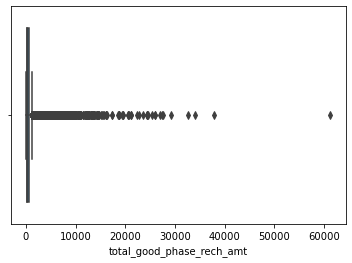

In [28]:
sns.boxplot(churn['total_good_phase_rech_amt'])

#### We observe outliers in the data, i.e only marginal portion recharged above 20K in first 2 months. For the rest of the costumers we observe continuous distribution

In [29]:
# find 70th quantile boundary
print(churn['total_good_phase_rech_amt'].quantile(0.7))

478.0


#### Lets Label our high value customers

In [30]:
churn['high_value_customer'] = np.where(churn['total_good_phase_rech_amt']>churn['total_good_phase_rech_amt'].quantile(0.7),1,0)
churn.head()

mobile_number  arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
0     7000842753  197.38         0.00          0.00           0.00   
1     7001865778   34.05        24.11         15.74           0.00   
2     7001625959  167.69        11.54        143.33           0.00   
3     7001204172  221.34        99.91        123.31           0.00   
4     7000142493  261.64        50.31         76.96           0.00   

   loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
1             23.88             11.51              0.00              0.00   
2              7.19             29.34             24.11              0.00   
3             73.68            107.43              1.91              0.00   
4             50.31             67.64              0.00              0.00   

   loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0          0.00              0.00              0.00              0.00   
1         35.39              0.23              0.00              0.00   
2         60.66              4.34             41.81              1.48   
3        183.03             26.23              2.99              0.00   
4        117.96              0.00              9.31              0.00   

   std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
0          0.00          0.00          0.00         0.00            0.00   
1          0.23          0.00          4.68         0.00           40.31   
2         47.64          0.00         46.56         0.45          155.33   
3         29.23          0.00         10.96         0.00          223.23   
4          9.31          0.00          0.00         0.00          127.28   

   roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0           0.00              0.00              0.00              0.00   
1           0.00              1.61             17.48              0.00   
2           0.00            115.69             14.38             99.48   
3           0.00             62.08            113.96             57.43   
4           0.00            105.68            106.84              1.50   

   loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0          0.00              0.00              0.00              0.00   
1         19.09              0.00              5.90              0.00   
2        229.56             72.41             45.18             21.73   
3        233.48             43.48              1.33              1.18   
4        214.03              0.00              1.93              0.00   

   std_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
0          0.00          0.00          0.00         0.00            0.00   
1          5.90          0.00          1.83         0.00           26.83   
2        139.33          0.21          0.00         0.93          370.04   
3         45.99          0.59          0.00         0.00          280.08   
4          1.93          0.00          0.00         0.48          216.44   

   total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
0               1.00                 4               362             252   
1               0.00                 4                74              44   
2               0.00                 5               168              86   
3               0.00                10               230              60   
4               1.00                 5               196              56   

   last_day_rch_amt_6 date_of_last_rech_6  max_rech_data_6  count_rech_2g_6  \
0                 252           6/21/2014           252.00             0.00   
1                  44           6/29/2014             0.00             0.00   
2                   0           6/17/2014             0.00             0.00   
3                  30           6/28/2014             0.00             0.00   
4                  50         

In [31]:
churn['high_value_customer'].value_counts()

0    70046
1    29953
Name: high_value_customer, dtype: int64

#### Lets now tag our Target Variable - Churn based on MoU and Data usage in 9th Month

In [32]:
churn['Target'] = np.where(churn['total_ic_mou_9'] + churn['total_og_mou_9'] + churn['vol_2g_mb_9'] + churn['vol_3g_mb_9'] == 0,
                          1,0)
churn[churn['Target']==1].head()

mobile_number   arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
0      7000842753   197.38         0.00          0.00           0.00   
7      7000701601 1,069.18        57.84        453.43          23.74   
29     7000039512   147.46        19.38        145.84           0.00   
32     7000382876    60.65         0.00         10.90           0.00   
35     7002108620   596.38        10.51        199.74         198.06   

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39            308.63             62.13              0.00   
29              0.70             17.54              0.00              6.28   
32              0.00             10.90              0.00              0.00   
35              0.00              2.50              0.00              0.00   

    loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0           0.00              0.00              0.00              0.00   
7         422.16              4.30             49.89              6.66   
29         18.24             18.68            118.14              0.00   
32         10.90              0.00              0.00              0.00   
35          2.50              9.70              0.00              0.00   

    std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
0           0.00          0.00          0.00         0.00            0.00   
7          60.86          0.00          4.50         0.00          487.53   
29        136.83          0.00         11.49         2.41          168.99   
32          0.00          0.00          0.21         0.00           11.11   
35          9.70          0.03          0.00         0.00           12.23   

    roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0            0.00              0.00              0.00              0.00   
7           16.23             58.14            217.56            152.16   
29           0.00              1.80              1.84              0.00   
32           0.00              7.98              6.46              0.00   
35         196.49              0.00              0.43              0.00   

    loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0           0.00              0.00              0.00              0.00   
7         427.88             36.89             91.44             52.19   
29          3.64              0.00             21.89              0.00   
32         14.44              0.00              0.00              0.00   
35          0.43              0.00              7.96              0.00   

    std_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
0           0.00          0.00          0.00         0.00            0.00   
7         180.54          0.21          2.06        15.74          626.46   
29         21.89          0.18          0.00         0.00           25.73   
32          0.00          0.08          0.00         0.00           14.53   
35          7.96          0.00          6.70         0.00           15.10   

    total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
0                1.00                 4               362             252   
7                0.00                 5              1580            1580   
29               0.00                 8               196              50   
32               3.00                 6                69              25   
35               0.00                 3               401             250   

    last_day_rch_amt_6 date_of_last_rech_6  max_rech_data_6  count_rech_2g_6  \
0                  252           6/21/2014           252.00             0.00   
7                    0           6/27/2014             0.00             0.00   
29                  30           6/30/2014             0.00             0.00   
32                  25           6/27/2014          

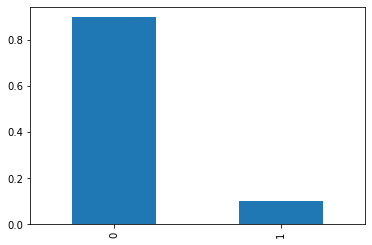

In [33]:
# Churn Split in Data

churn['Target'].value_counts(normalize=True).plot(kind='bar')

#### Lets Get Rid of Spetember data, now that we have identified Target Variable & High value customers

In [34]:
sept_cols = [col for col in churn.columns if '_9' in col]
print(sept_cols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [35]:
# Drop Columns

churn = churn.drop(sept_cols, axis=1)

print(churn.shape)

(99999, 164)


In [36]:
churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 164 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   mobile_number              int64  
 1   arpu_6                     float64
 2   onnet_mou_6                float64
 3   offnet_mou_6               float64
 4   roam_og_mou_6              float64
 5   loc_og_t2t_mou_6           float64
 6   loc_og_t2m_mou_6           float64
 7   loc_og_t2f_mou_6           float64
 8   loc_og_t2c_mou_6           float64
 9   loc_og_mou_6               float64
 10  std_og_t2t_mou_6           float64
 11  std_og_t2m_mou_6           float64
 12  std_og_t2f_mou_6           float64
 13  std_og_mou_6               float64
 14  isd_og_mou_6               float64
 15  spl_og_mou_6               float64
 16  og_others_6                float64
 17  total_og_mou_6             float64
 18  roam_ic_mou_6              float64
 19  loc_ic_t2t_mou_6           float64
 20  loc_i

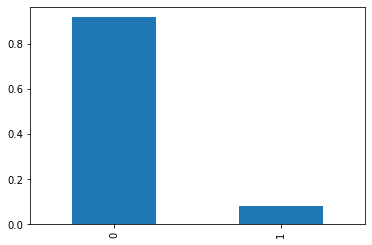

In [37]:
#Carve out HVC dataframe
hvc = churn[churn['high_value_customer']==1]

# Churn Split in HVC 
hvc['Target'].value_counts(normalize=True).plot(kind='bar')

In [38]:
# Overall Churn Rate

print("Overall Churn rate: " + str((sum(churn['Target'])/len(churn['Target'].index))*100))

# HVC Churn Rate

print("HVC Churn rate: " + str((sum(hvc['Target'])/len(hvc.index))*100))

Overall Churn rate: 10.19110191101911
HVC Churn rate: 8.122725603445398


## 4. Exploratory Data Analysis

### Univariate Analysis

In [39]:
# Method to generate standard SNS boxplot & distplots to analyze data points distribution

def univariate_analysis_nbyn(data,features,n,sns_chart_type):
    feature_count = len(features)
    if feature_count != (n**2):
        print("Error: Number of features can't be fit into square matrix for given rows & columns")
        return()
    else:
        plt.figure(figsize=(18,15))
        for i in range(1,feature_count+1):
            plt.subplot(n, n, i)
            plt.title(features[i-1])
            if sns_chart_type == 'boxplot':
                sns.boxplot(data[features[i-1]])
            elif sns_chart_type == 'distplot':
                sns.distplot(data[features[i-1]])
            else:
                print("Supports only boxplot or distplot - retry")
                return()
        plt.show()

In [40]:
set1 = ['arpu_6','arpu_2g_6','arpu_3g_6','total_og_mou_6','total_ic_mou_6','total_rech_amt_6',
        'aon','jun_vbc_3g','roam_og_mou_6']
set2 = ['arpu_7','arpu_2g_7','arpu_3g_7','total_og_mou_7','total_ic_mou_7','total_rech_amt_7',
        'loc_og_mou_7','jul_vbc_3g','roam_og_mou_7']
set3 = ['arpu_8','arpu_2g_8','arpu_3g_8','total_og_mou_8','total_ic_mou_8','total_rech_amt_8',
        'loc_og_mou_8','aug_vbc_3g','roam_og_mou_8']
set4 = ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','std_og_t2t_mou_6',
       'std_og_t2m_mou_6','std_og_t2f_mou_6','onnet_mou_6','onnet_mou_6']
set5 = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6','std_ic_t2f_mou_6','max_rech_amt_6','vol_2g_mb_6','vol_3g_mb_6']
set6 = ['monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8',
           'monthly_3g_6', 'monthly_3g_7','monthly_3g_8']

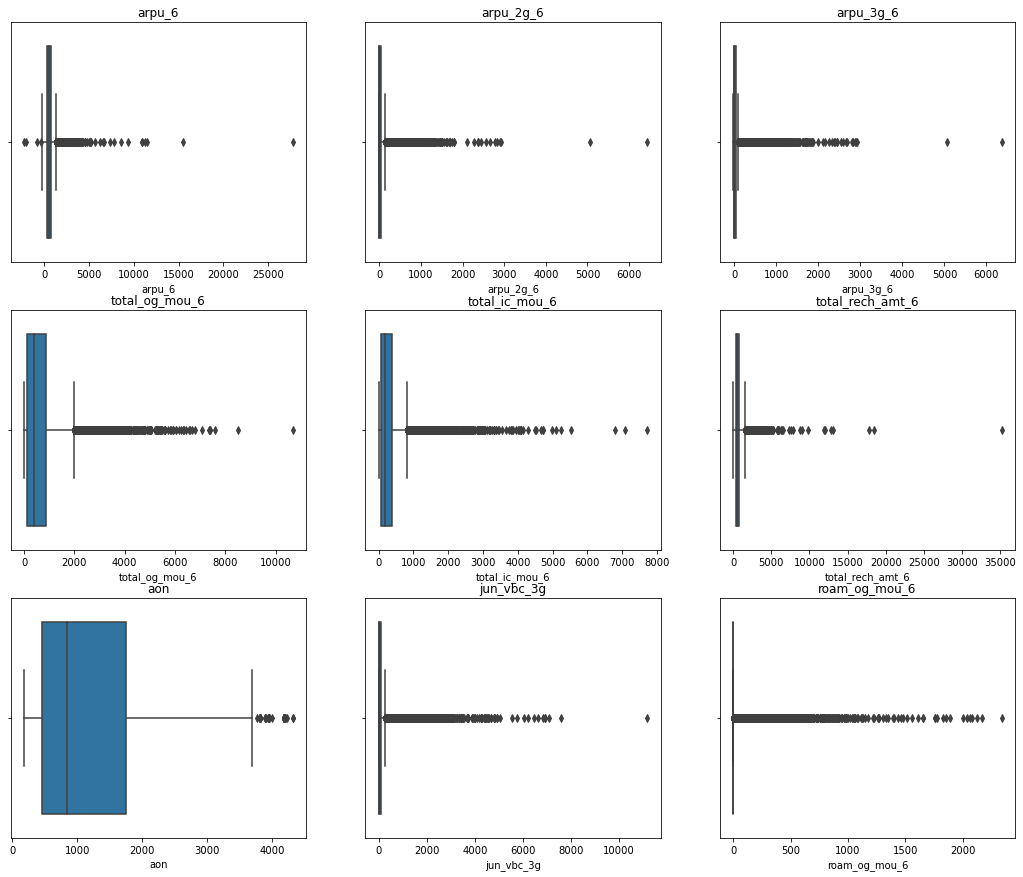

In [41]:
univariate_analysis_nbyn(hvc, set1, 3, "boxplot")

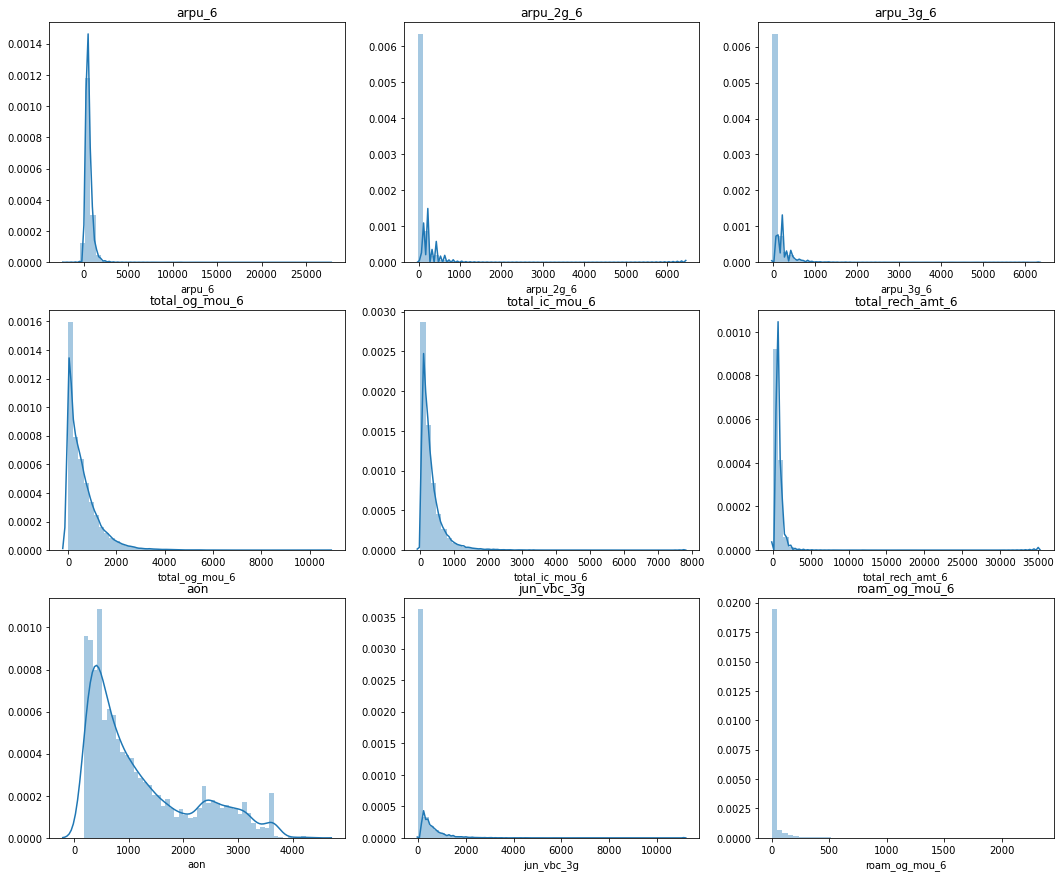

In [42]:
univariate_analysis_nbyn(hvc, set1, 3, "distplot")

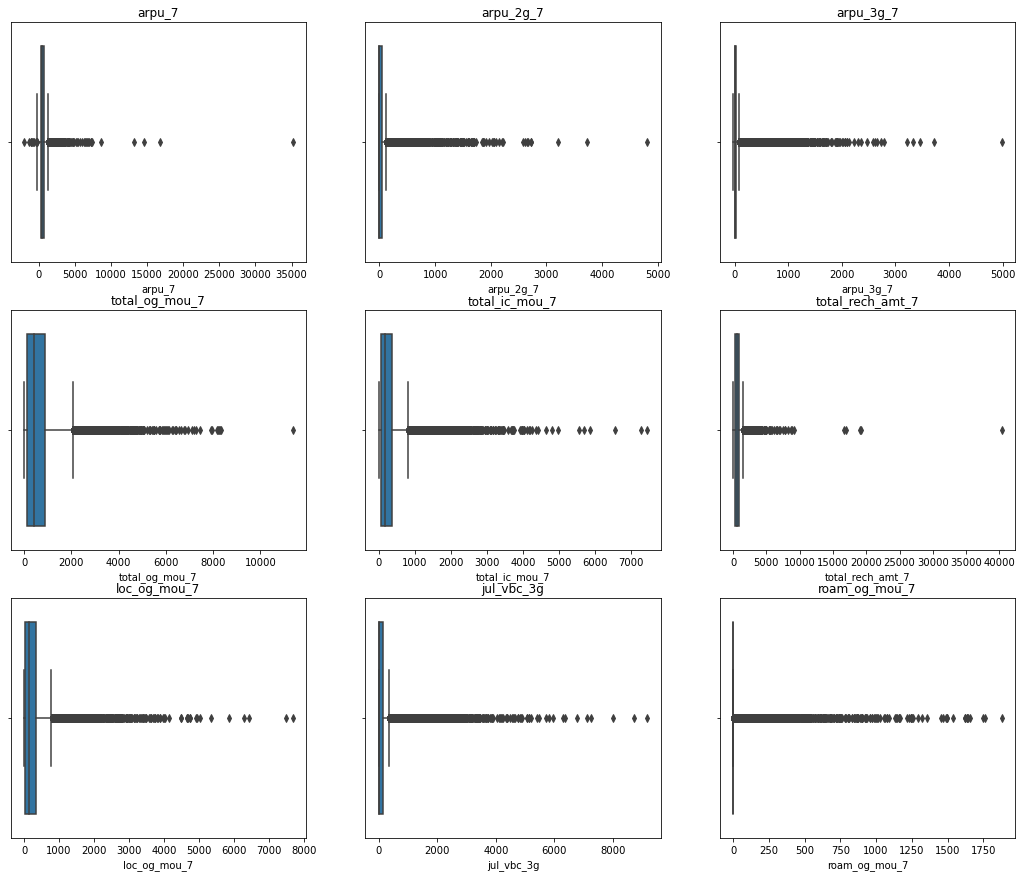

In [43]:
univariate_analysis_nbyn(hvc, set2, 3, "boxplot")

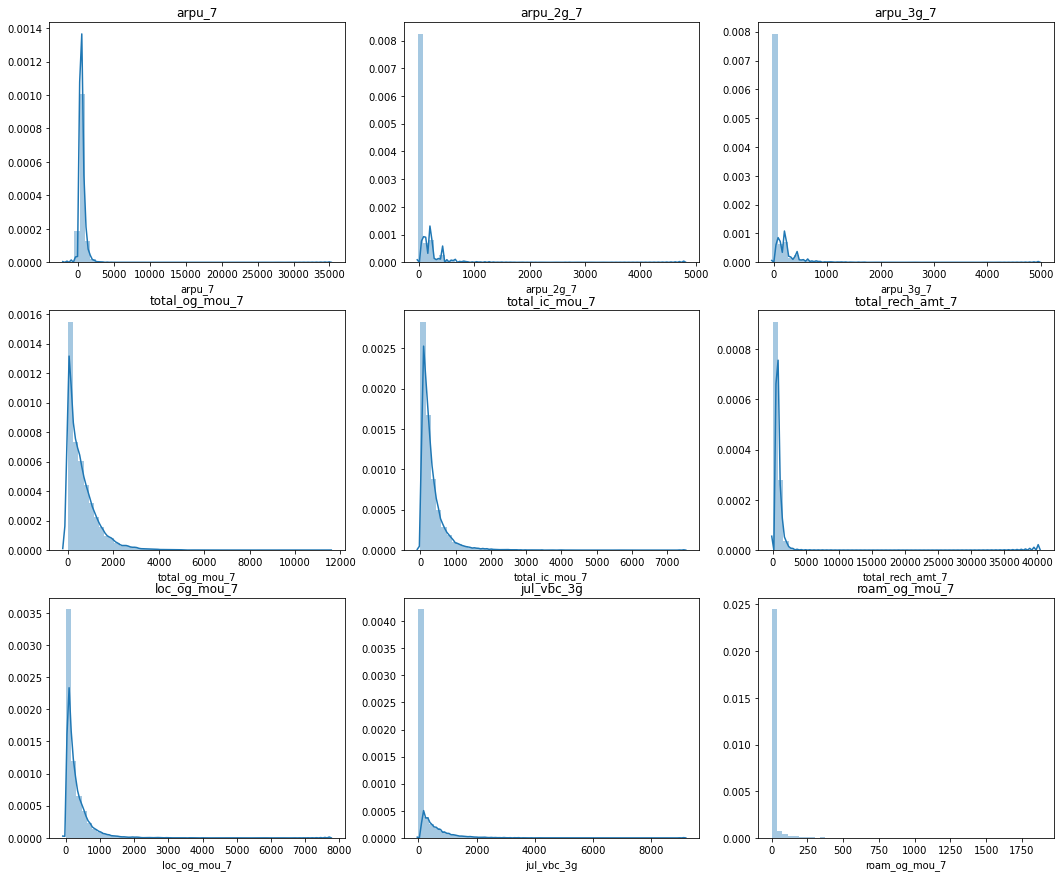

In [44]:
univariate_analysis_nbyn(hvc, set2, 3, "distplot")

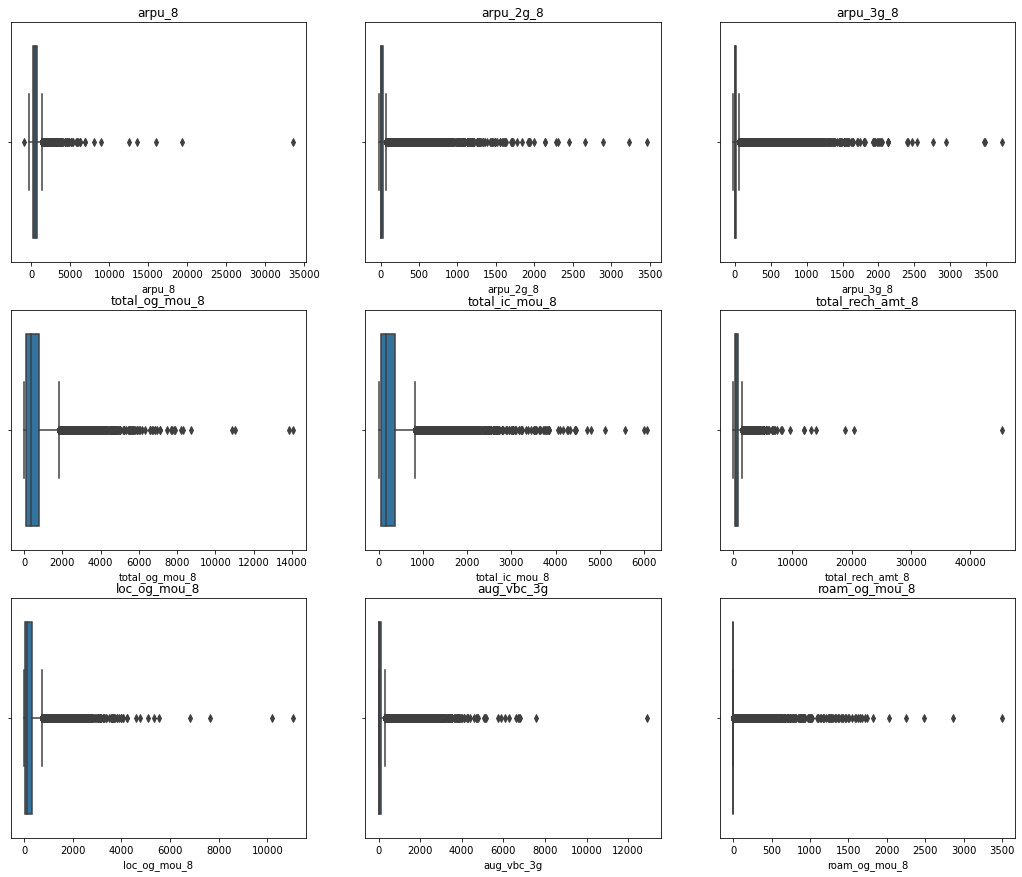

In [45]:
univariate_analysis_nbyn(hvc, set3, 3, "boxplot")

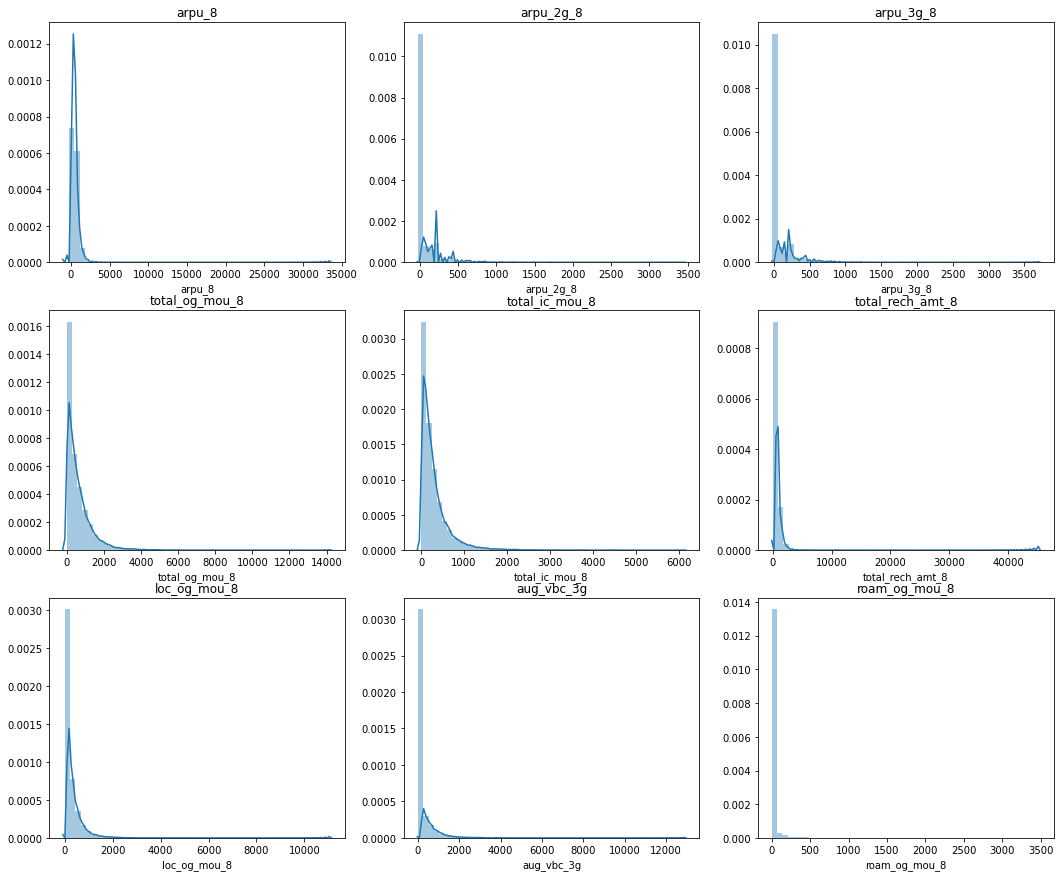

In [46]:
univariate_analysis_nbyn(hvc, set3, 3, "distplot")

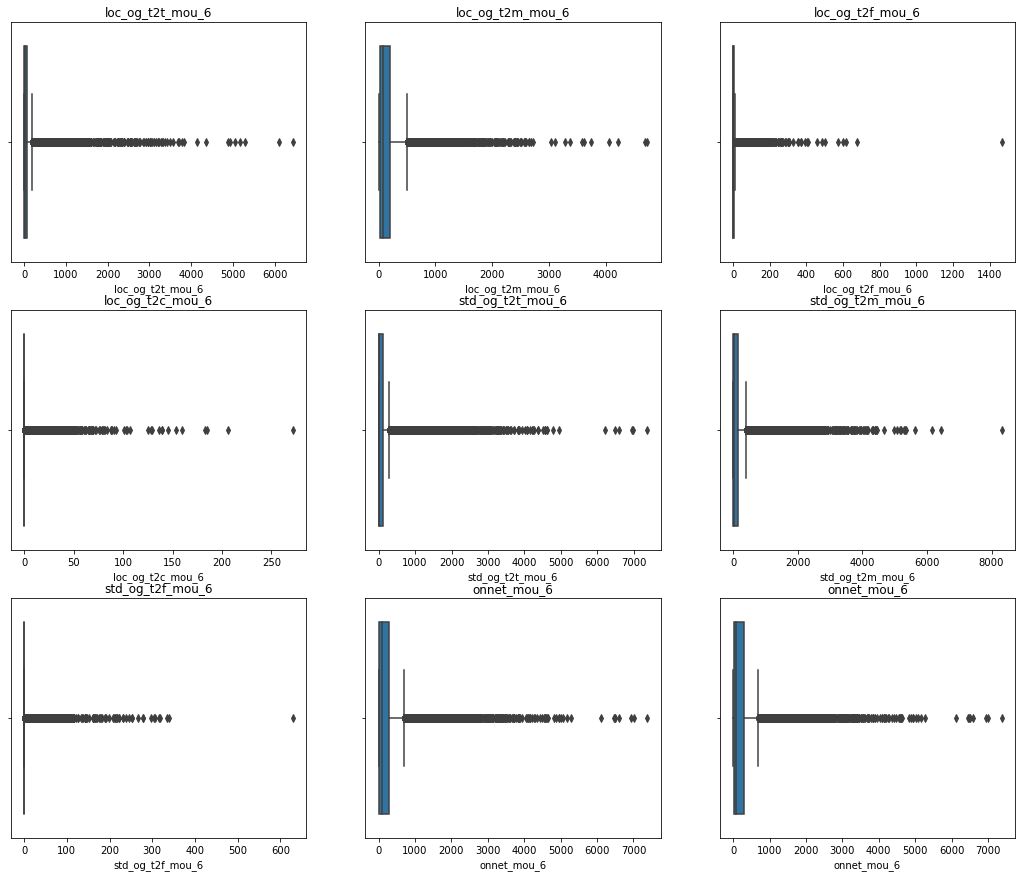

In [47]:
univariate_analysis_nbyn(hvc, set4, 3, "boxplot")

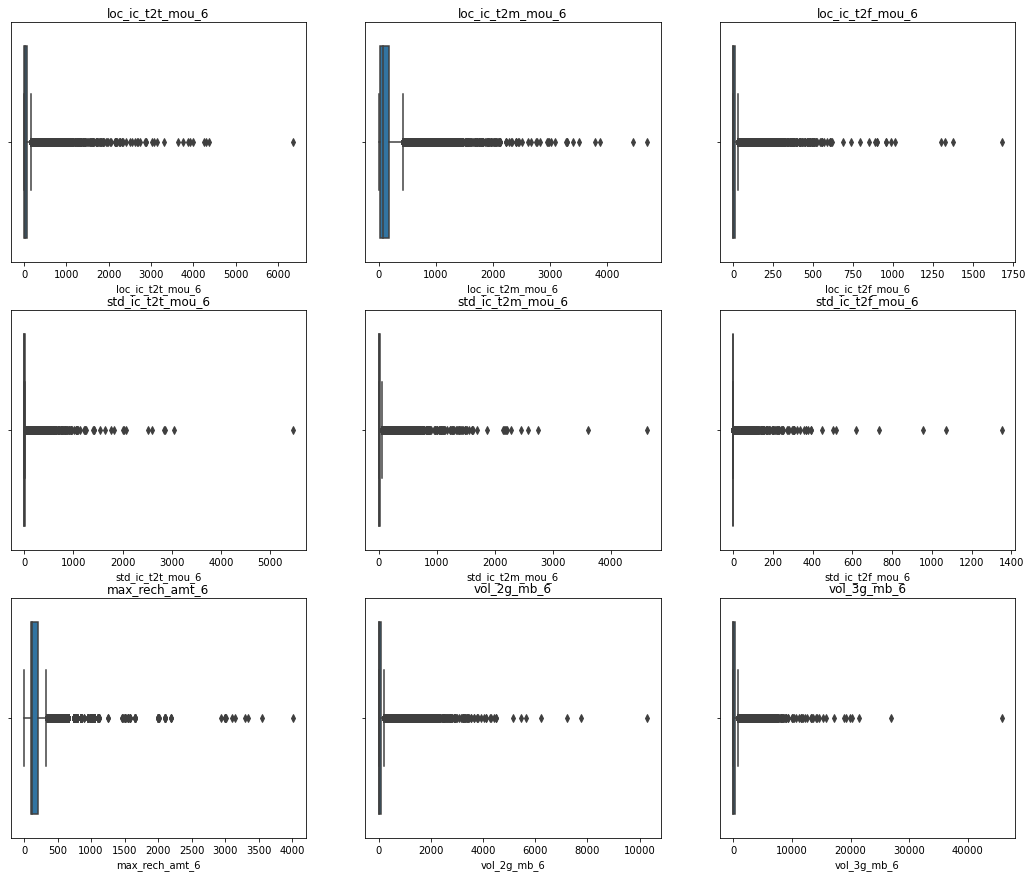

In [48]:
univariate_analysis_nbyn(hvc, set5, 3, "boxplot")

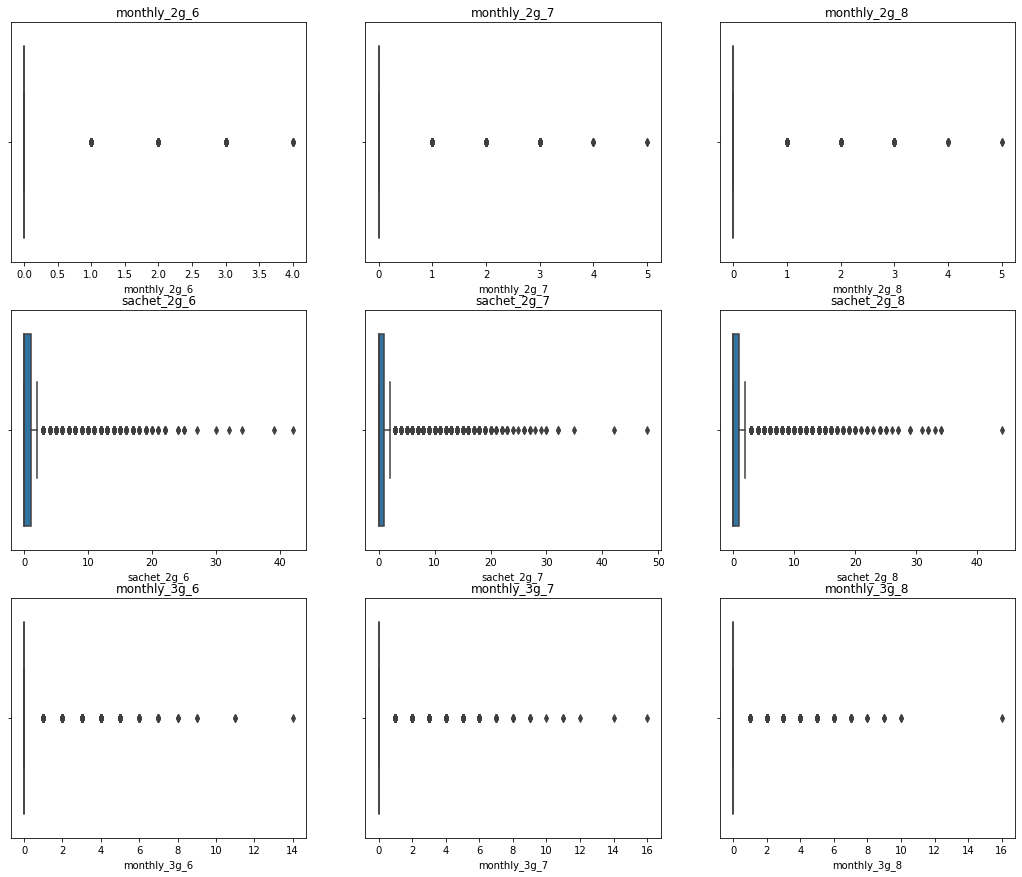

In [49]:
univariate_analysis_nbyn(hvc, set6, 3, "boxplot")

#### We can Observe that most numeric columns have outliers post ~99.5 percentile, lets cap values for better results

In [50]:
# Categorical Variables
cat_var = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8',
           'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
          'date_of_last_rech_data_7','date_of_last_rech_data_8']

In [51]:
# Define Numeric Variable
num_var = [col for col in hvc.columns if col not in cat_var]

In [52]:
#### Outlier Handling using IQR

for col in num_var:
    Q1 = hvc[col].quantile(0.001)
    Q4 = hvc[col].quantile(0.995)
    hvc[col][hvc[col]<=Q1]=Q1
    hvc[col][hvc[col]>=Q4]=Q4

In [53]:
hvc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 164 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   mobile_number              float64
 1   arpu_6                     float64
 2   onnet_mou_6                float64
 3   offnet_mou_6               float64
 4   roam_og_mou_6              float64
 5   loc_og_t2t_mou_6           float64
 6   loc_og_t2m_mou_6           float64
 7   loc_og_t2f_mou_6           float64
 8   loc_og_t2c_mou_6           float64
 9   loc_og_mou_6               float64
 10  std_og_t2t_mou_6           float64
 11  std_og_t2m_mou_6           float64
 12  std_og_t2f_mou_6           float64
 13  std_og_mou_6               float64
 14  isd_og_mou_6               float64
 15  spl_og_mou_6               float64
 16  og_others_6                float64
 17  total_og_mou_6             float64
 18  roam_ic_mou_6              float64
 19  loc_ic_t2t_mou_6           float64
 20  loc_i

### Bi-Variate Analysis

In [54]:
# Method to generate standard SNS boxplot & distplots to analyze data points distribution

def univariate_analysis_cat_nbyn(data,features,n):
    feature_count = len(features)
    if feature_count != (n**2):
        print("Error: Number of features can't be fit into square matrix for given rows & columns")
        return()
    else:
        plt.figure(figsize=(18,15))
        for i in range(1,feature_count+1):
            plt.subplot(n, n, i)
            plt.title(features[i-1])
            data.groupby(features[i-1])['Target'].mean().sort_values().plot.barh()
            #data[features[i-1]].value_counts(normalize=True).plot(kind='bar')
        plt.show()

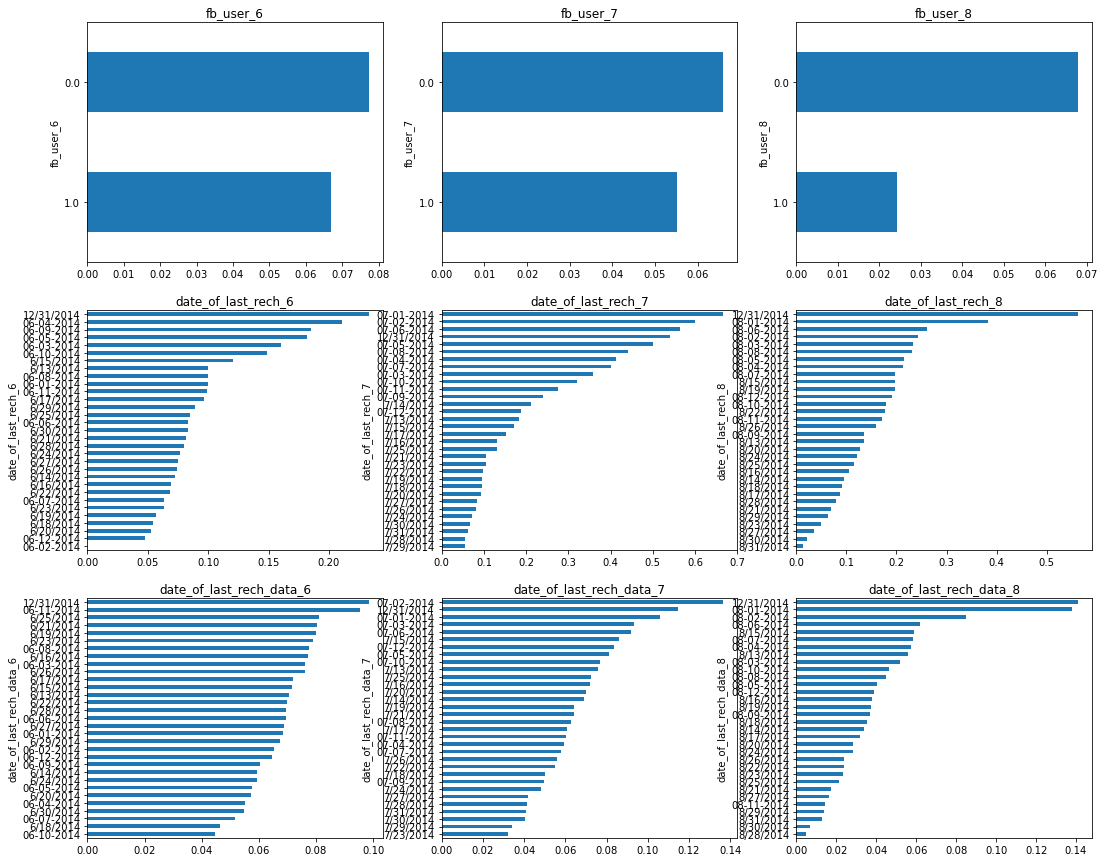

In [55]:
univariate_analysis_cat_nbyn(hvc,cat_var[3:12],3)

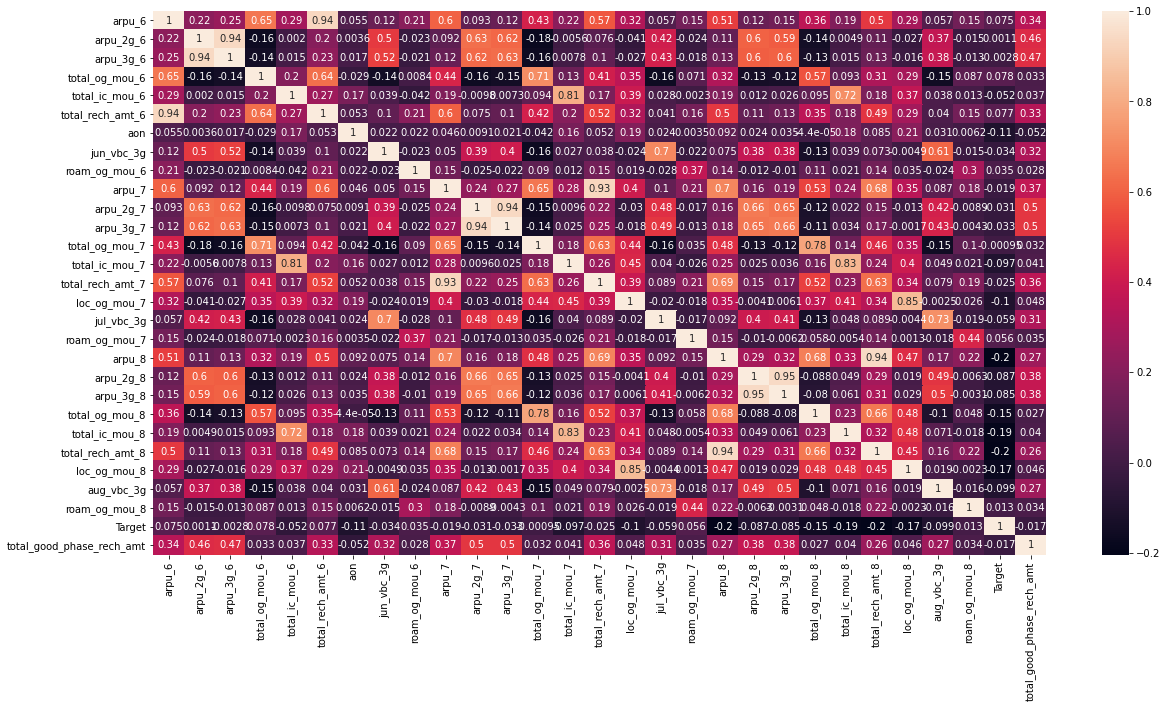

In [56]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(hvc[set1+set2+set3+['Target','total_good_phase_rech_amt']].corr(),annot = True)

## 5. Feature Engineering

In [57]:
# Lets derive some information from the data available

hvc['arpu_diff'] = hvc.arpu_8 - ((hvc.arpu_6 + hvc.arpu_7)/2)

hvc['onnet_mou_diff'] = hvc.onnet_mou_8 - ((hvc.onnet_mou_6 + hvc.onnet_mou_7)/2)

hvc['offnet_mou_diff'] = hvc.offnet_mou_8 - ((hvc.offnet_mou_6 + hvc.offnet_mou_7)/2)

hvc['roam_ic_mou_diff'] = hvc.roam_ic_mou_8 - ((hvc.roam_ic_mou_6 + hvc.roam_ic_mou_7)/2)

hvc['roam_og_mou_diff'] = hvc.roam_og_mou_8 - ((hvc.roam_og_mou_6 + hvc.roam_og_mou_7)/2)

hvc['loc_og_mou_diff'] = hvc.loc_og_mou_8 - ((hvc.loc_og_mou_6 + hvc.loc_og_mou_7)/2)

hvc['std_og_mou_diff'] = hvc.std_og_mou_8 - ((hvc.std_og_mou_6 + hvc.std_og_mou_7)/2)

hvc['isd_og_mou_diff'] = hvc.isd_og_mou_8 - ((hvc.isd_og_mou_6 + hvc.isd_og_mou_7)/2)

hvc['spl_og_mou_diff'] = hvc.spl_og_mou_8 - ((hvc.spl_og_mou_6 + hvc.spl_og_mou_7)/2)

hvc['total_og_mou_diff'] = hvc.total_og_mou_8 - ((hvc.total_og_mou_6 + hvc.total_og_mou_7)/2)

hvc['loc_ic_mou_diff'] = hvc.loc_ic_mou_8 - ((hvc.loc_ic_mou_6 + hvc.loc_ic_mou_7)/2)

hvc['std_ic_mou_diff'] = hvc.std_ic_mou_8 - ((hvc.std_ic_mou_6 + hvc.std_ic_mou_7)/2)

hvc['isd_ic_mou_diff'] = hvc.isd_ic_mou_8 - ((hvc.isd_ic_mou_6 + hvc.isd_ic_mou_7)/2)

hvc['spl_ic_mou_diff'] = hvc.spl_ic_mou_8 - ((hvc.spl_ic_mou_6 + hvc.spl_ic_mou_7)/2)

hvc['total_ic_mou_diff'] = hvc.total_ic_mou_8 - ((hvc.total_ic_mou_6 + hvc.total_ic_mou_7)/2)

hvc['total_rech_num_diff'] = hvc.total_rech_num_8 - ((hvc.total_rech_num_6 + hvc.total_rech_num_7)/2)

hvc['total_rech_amt_diff'] = hvc.total_rech_amt_8 - ((hvc.total_rech_amt_6 + hvc.total_rech_amt_7)/2)

hvc['max_rech_amt_diff'] = hvc.max_rech_amt_8 - ((hvc.max_rech_amt_6 + hvc.max_rech_amt_7)/2)

hvc['total_rech_data_diff'] = hvc.total_rech_data_8 - ((hvc.total_rech_data_6 + hvc.total_rech_data_7)/2)

hvc['max_rech_data_diff'] = hvc.max_rech_data_8 - ((hvc.max_rech_data_6 + hvc.max_rech_data_7)/2)

hvc['av_rech_amt_data_diff'] = hvc.av_rech_amt_data_8 - ((hvc.av_rech_amt_data_6 + hvc.av_rech_amt_data_7)/2)

hvc['vol_2g_mb_diff'] = hvc.vol_2g_mb_8 - ((hvc.vol_2g_mb_6 + hvc.vol_2g_mb_7)/2)

hvc['vol_3g_mb_diff'] = hvc.vol_3g_mb_8 - ((hvc.vol_3g_mb_6 + hvc.vol_3g_mb_7)/2)

#### Specially During the Trouble Phase i.e 8th Month - Aug, if folks did not recharge data pack - we earlier observed more than 50% churned - that could be a strong signal - Lets derive a boolean for it & get rid of date columns

In [58]:
hvc['no_recharge_in_trouble_phase'] = np.where(hvc['date_of_last_rech_8']=='12/31/2014',1,0)
hvc.head()

mobile_number   arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  \
0  7,000,842,753.00   197.38         0.00          0.00           0.00   
7  7,000,701,601.00 1,069.18        57.84        453.43          23.74   
8  7,001,524,846.00   378.72       413.69         94.66           0.00   
21 7,002,124,215.00   514.45       102.41        757.93           0.00   
23 7,000,887,461.00    74.35        48.96         85.41           0.00   

    loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39            308.63             62.13              0.00   
8             297.13             80.96              0.00              0.00   
21              4.48             91.81              0.75              0.00   
23             48.96             82.94              0.00              0.00   

    loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
0           0.00              0.00              0.00              0.00   
7         422.16              4.30             49.89              6.66   
8         378.09            116.56             13.69              0.00   
21         97.04             97.93            665.36              0.00   
23        131.91              0.00              2.36              0.00   

    std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
0           0.00          0.00          0.00         0.00            0.00   
7          60.86          0.00          4.50         0.00          487.53   
8         130.26          0.00          0.00         0.00          508.36   
21        763.29          0.00          0.00         0.00          860.34   
23          2.36          0.00          0.10         0.00          134.38   

    roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0            0.00              0.00              0.00              0.00   
7           16.23             58.14            217.56            152.16   
8            0.00             23.84             57.58              0.00   
21           0.00              2.48            118.23              4.61   
23           0.00             20.71             95.91              0.00   

    loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0           0.00              0.00              0.00              0.00   
7         427.88             36.89             91.44             52.19   
8          81.43              0.00             22.43              0.00   
21        125.33             14.06             67.69              0.00   
23        116.63              0.51              2.43              0.00   

    std_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
0           0.00          0.00          0.00         0.00            0.00   
7         180.54          0.21          2.06        15.74          626.46   
8          22.43          0.00          0.00         0.00          103.86   
21         81.76          0.00          0.00         0.00          207.09   
23          2.94          0.00          0.00         0.00          119.58   

    total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
0                1.00                 4            362.00             252   
7                0.00                 5          1,580.00            1010   
8                0.00                19            437.00              90   
21               0.00                22            600.00              50   
23               0.00                 3              0.00               0   

    last_day_rch_amt_6 date_of_last_rech_6  max_rech_data_6  count_rech_2g_6  \
0                  252           6/21/2014           252.00             0.00   
7                    0           6/27/2014             0.00             0.00   
8                   50           6/25/2014             0.00             0.00   
21                  30           6/30/2014

In [59]:
# Define Numeric Variable
num_var = [col for col in hvc.columns if col not in cat_var]

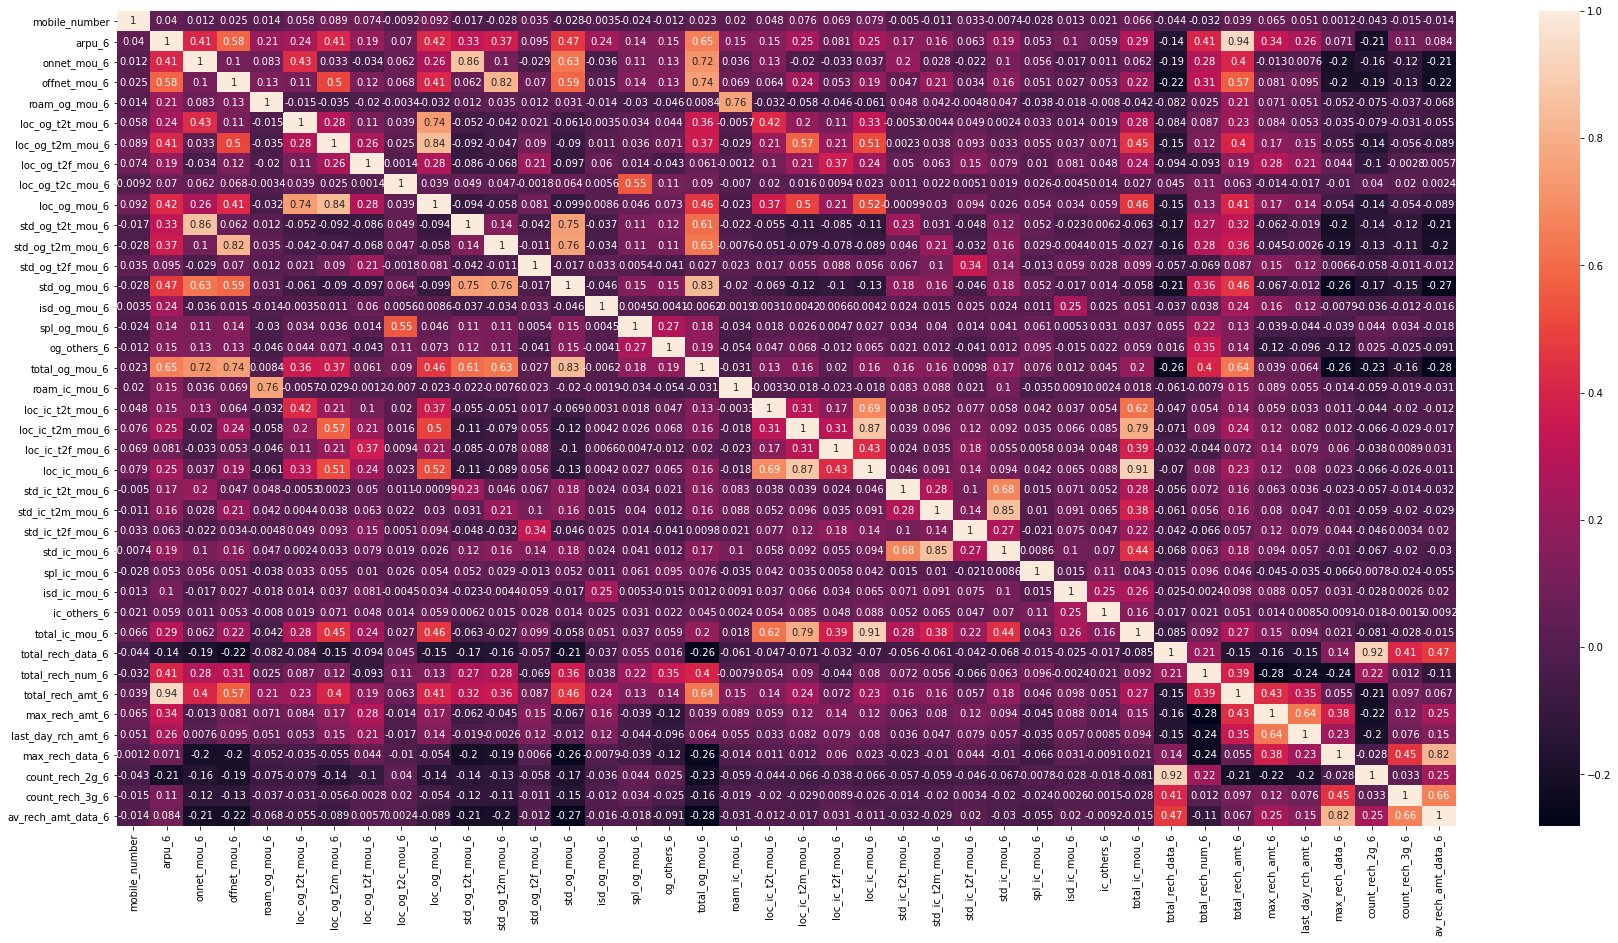

In [60]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
num_set1 = num_var[0:40]
sns.heatmap(hvc[num_set1].corr(),annot = True)

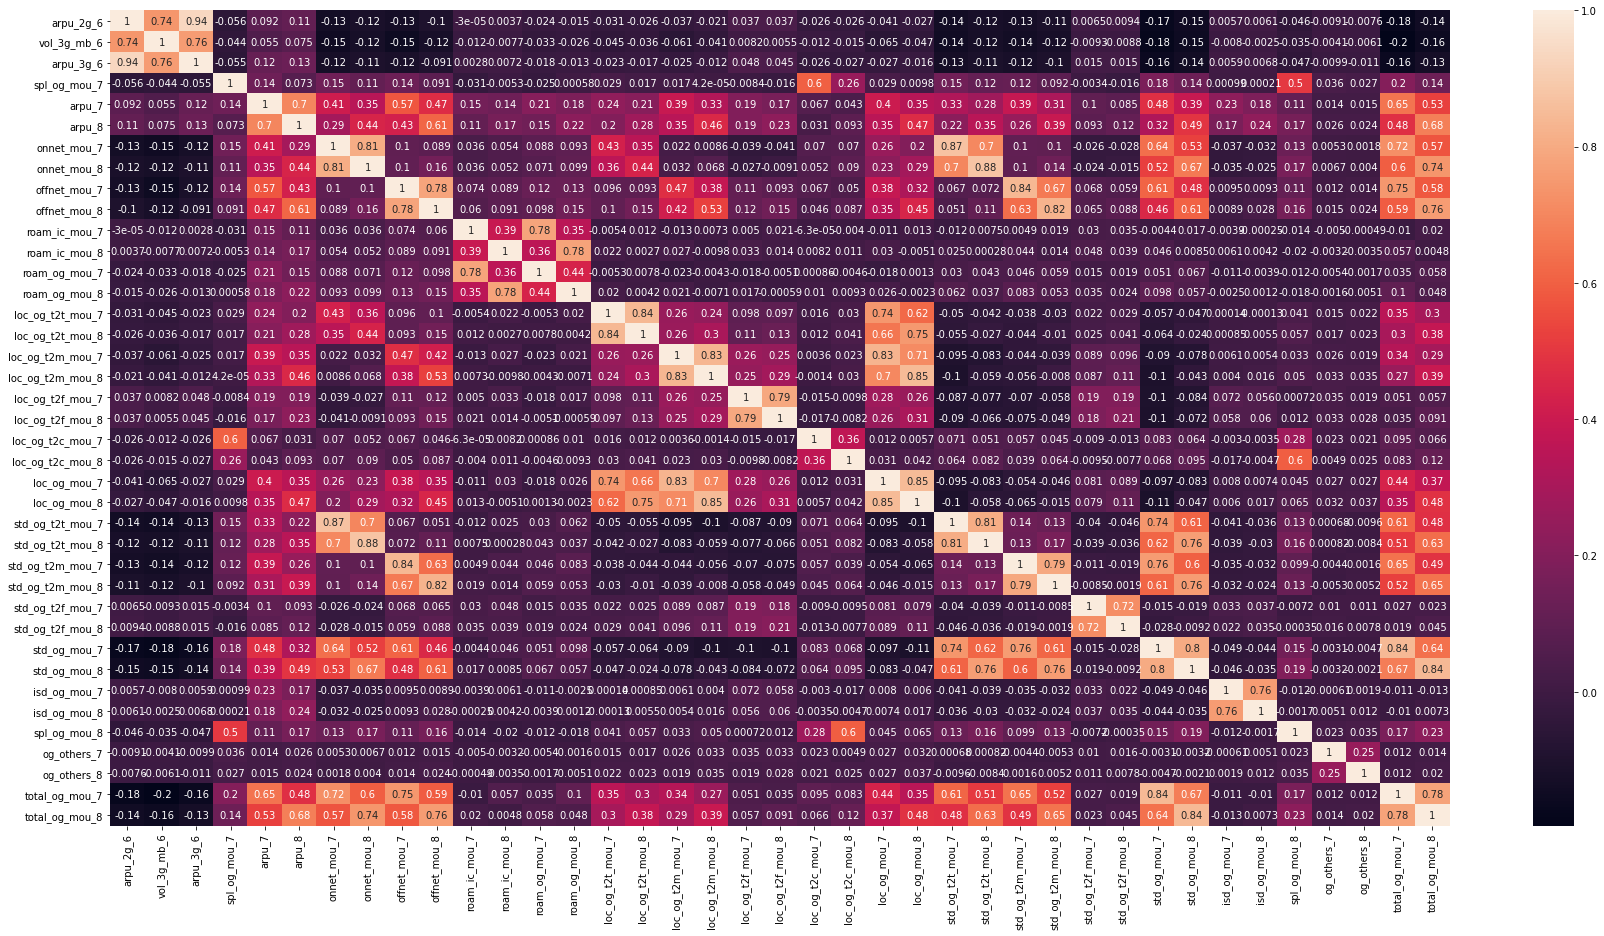

In [61]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
num_set2 = num_var[41:80]
sns.heatmap(hvc[num_set2].corr(),annot = True)

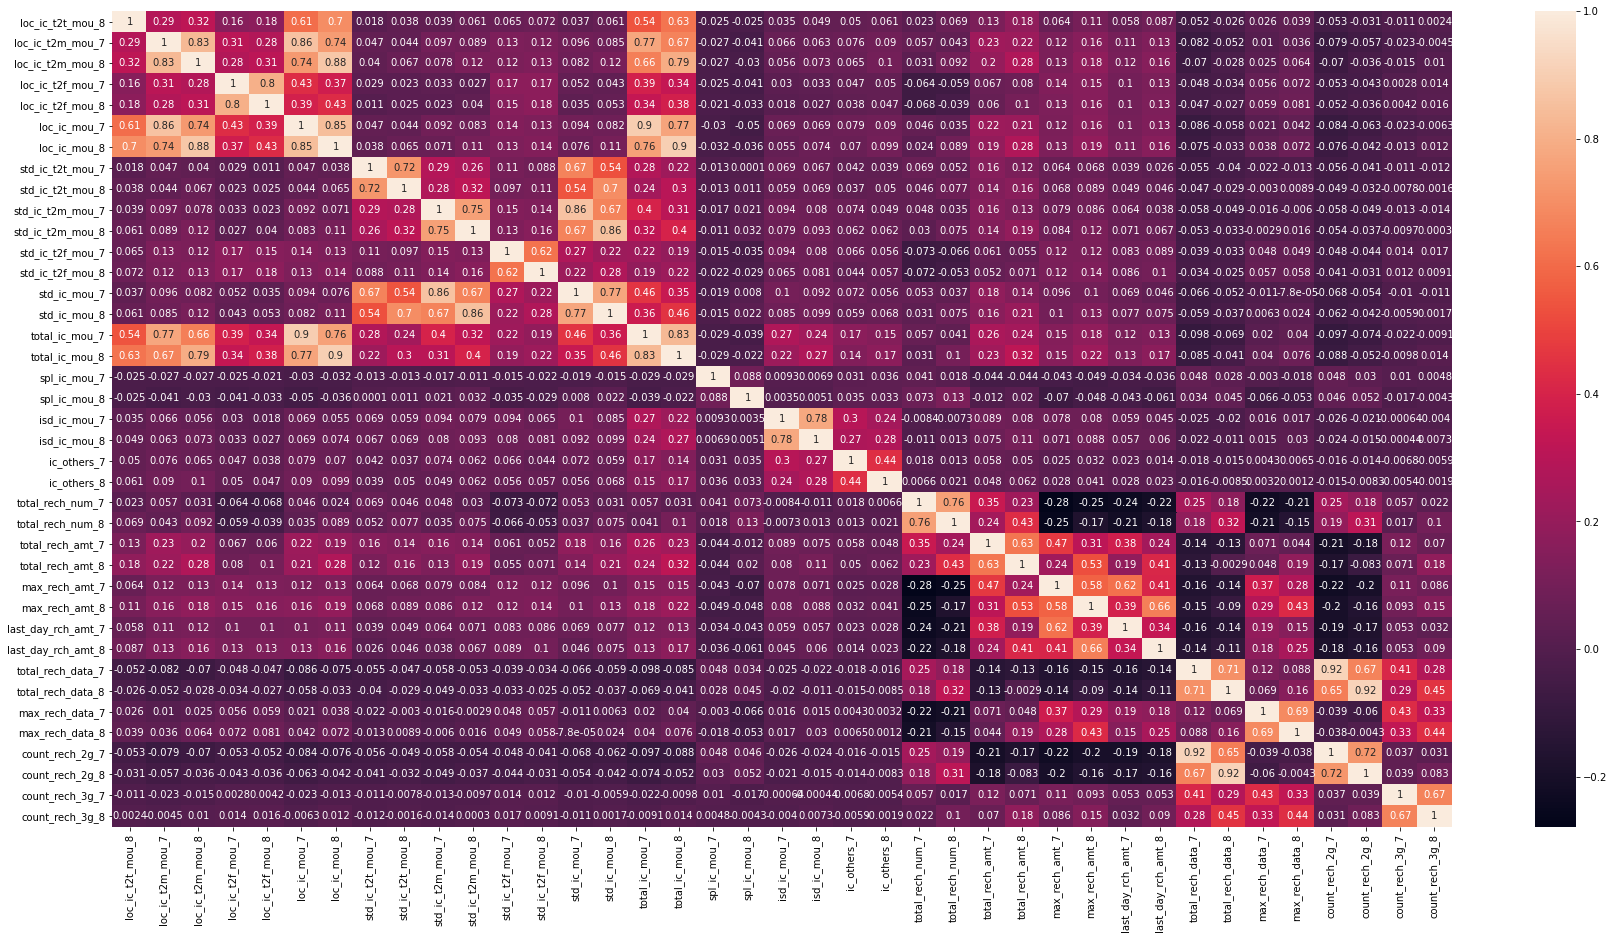

In [62]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
num_set3 = num_var[81:120]
sns.heatmap(hvc[num_set3].corr(),annot = True)

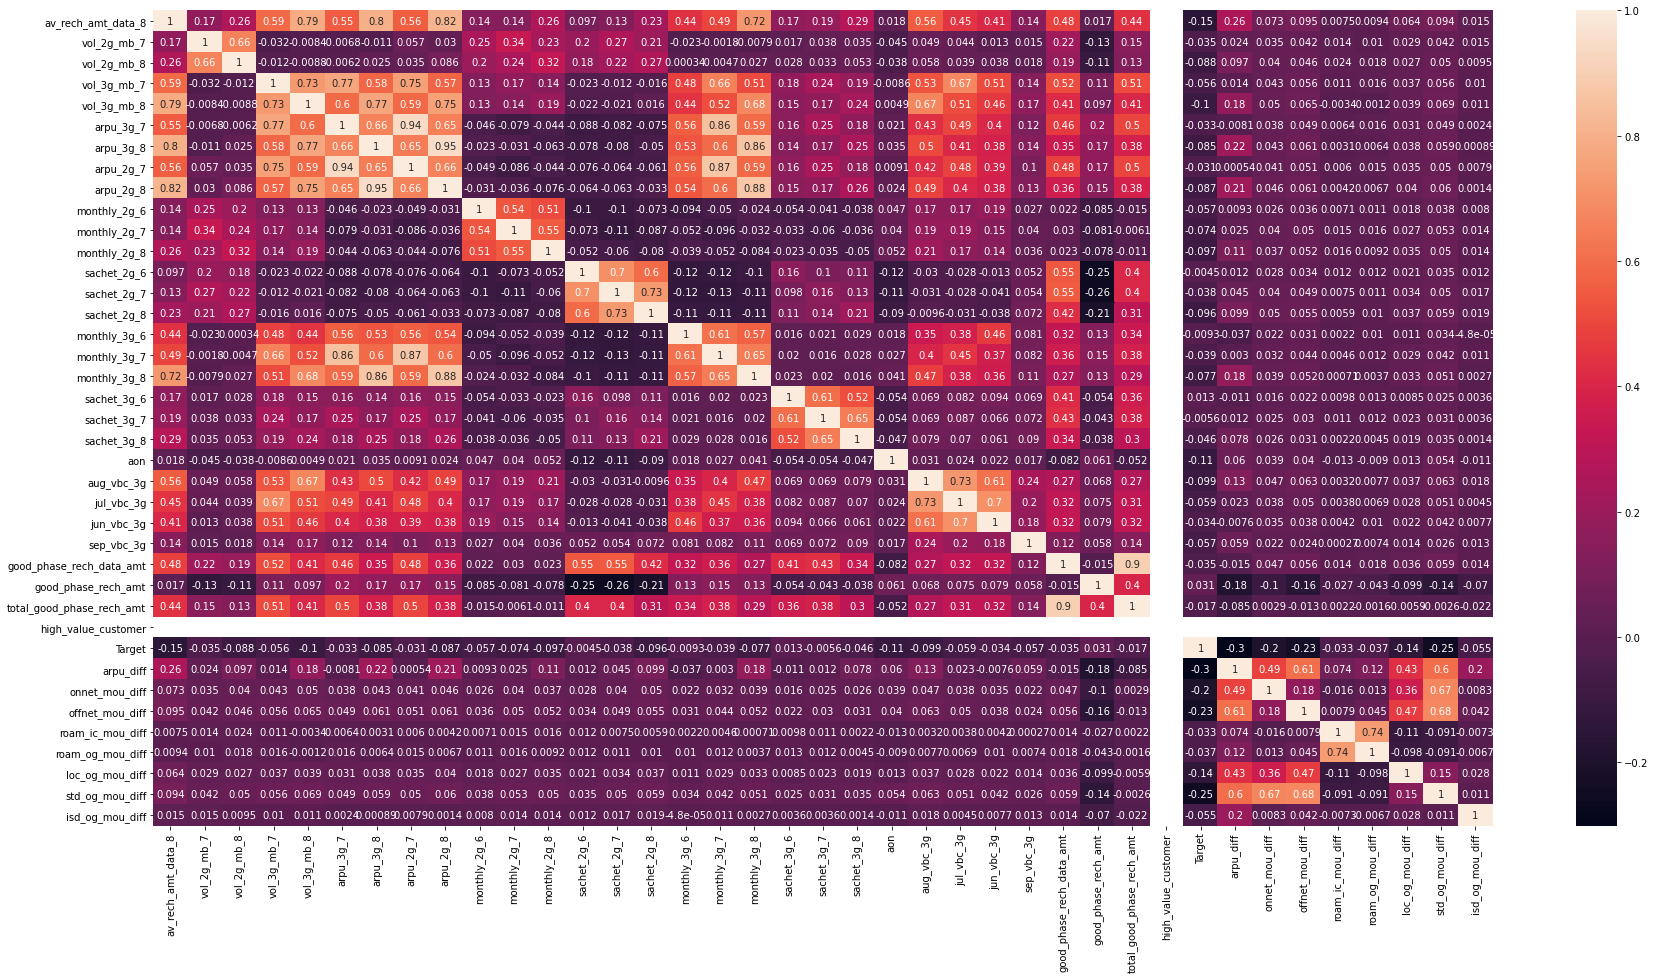

In [63]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
num_set3 = num_var[121:160]
sns.heatmap(hvc[num_set3].corr(),annot = True)

In [64]:
id_cols = ['mobile_number', 'high_value_customer']

date_cols = ['date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
            ]

In [65]:
# drop id and date columns
print("Shape before dropping: ", hvc.shape)
hvc = hvc.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", hvc.shape)

Shape before dropping:  (29953, 188)
Shape after dropping:  (29953, 180)


In [66]:
# Re-initialize numeric & categorical variables as we have deleted some columns
cat_var = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
num_var = [col for col in hvc.columns if col not in cat_var]

In [67]:
hvc[num_var] = hvc[num_var].apply(pd.to_numeric)
hvc[cat_var] = hvc[cat_var].apply(lambda column: column.astype("category"), axis=0)

In [68]:
hvc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 180 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   arpu_6                        float64 
 1   onnet_mou_6                   float64 
 2   offnet_mou_6                  float64 
 3   roam_og_mou_6                 float64 
 4   loc_og_t2t_mou_6              float64 
 5   loc_og_t2m_mou_6              float64 
 6   loc_og_t2f_mou_6              float64 
 7   loc_og_t2c_mou_6              float64 
 8   loc_og_mou_6                  float64 
 9   std_og_t2t_mou_6              float64 
 10  std_og_t2m_mou_6              float64 
 11  std_og_t2f_mou_6              float64 
 12  std_og_mou_6                  float64 
 13  isd_og_mou_6                  float64 
 14  spl_og_mou_6                  float64 
 15  og_others_6                   float64 
 16  total_og_mou_6                float64 
 17  roam_ic_mou_6                 float64 
 18  loc_i

## Dummification & Feature Scaling

In [69]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(hvc[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6',
                             'fb_user_7','fb_user_8']], drop_first=True)

# Adding the results to the master dataframe
hvc = pd.concat([hvc, dummy1], axis=1)

hvc.head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  loc_og_t2t_mou_6  \
0    197.38         0.00          0.00           0.00              0.00   
7  1,069.18        57.84        453.43          23.74             51.39   
8    378.72       413.69         94.66           0.00            297.13   
21   514.45       102.41        757.93           0.00              4.48   
23    74.35        48.96         85.41           0.00             48.96   

    loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_mou_6  \
0               0.00              0.00              0.00          0.00   
7             308.63             62.13              0.00        422.16   
8              80.96              0.00              0.00        378.09   
21             91.81              0.75              0.00         97.04   
23             82.94              0.00              0.00        131.91   

    std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_mou_6  \
0               0.00              0.00              0.00          0.00   
7               4.30             49.89              6.66         60.86   
8             116.56             13.69              0.00        130.26   
21             97.93            665.36              0.00        763.29   
23              0.00              2.36              0.00          2.36   

    isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  roam_ic_mou_6  \
0           0.00          0.00         0.00            0.00           0.00   
7           0.00          4.50         0.00          487.53          16.23   
8           0.00          0.00         0.00          508.36           0.00   
21          0.00          0.00         0.00          860.34           0.00   
23          0.00          0.10         0.00          134.38           0.00   

    loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  \
0               0.00              0.00              0.00          0.00   
7              58.14            217.56            152.16        427.88   
8              23.84             57.58              0.00         81.43   
21              2.48            118.23              4.61        125.33   
23             20.71             95.91              0.00        116.63   

    std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6  \
0               0.00              0.00              0.00          0.00   
7              36.89             91.44             52.19        180.54   
8               0.00             22.43              0.00         22.43   
21             14.06             67.69              0.00         81.76   
23              0.51              2.43              0.00          2.94   

    spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
0           0.00          0.00         0.00            0.00   
7           0.21          2.06        15.74          626.46   
8           0.00          0.00         0.00          103.86   
21          0.00          0.00         0.00          207.09   
23          0.00          0.00         0.00          119.58   

    total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
0                1.00                 4            362.00             252   
7                0.00                 5          1,580.00            1010   
8                0.00                19            437.00              90   
21               0.00                22            600.00              50   
23               0.00                 3              0.00               0   

    last_day_rch_amt_6  max_rech_data_6  count_rech_2g_6  count_rech_3g_6  \
0                  252           252.00             0.00             1.00   
7                    0             0.00             0.00             0.00   
8                   50             0.00             0.00             0.00   
21                  30             0.00             0.00             0.00   
23                   0             0.00             0.00             0.00   



In [70]:
hvc = hvc.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6',
                             'fb_user_7','fb_user_8'], axis=1)

# Model Building

#### Splitting Data into Train & Test

In [71]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = hvc.drop(['Target'],axis=1)

# Putting response variable to y
y = hvc['Target']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: Target, dtype: int32

In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Scaling features using Standard Scaler

In [73]:
scaler = StandardScaler()

num_var.remove('Target')

X_train[num_var] = scaler.fit_transform(X_train[num_var])

In [74]:
X_train.head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  loc_og_t2t_mou_6  \
16686    0.05        -0.09          0.47           5.22             -0.40   
84709    0.58         0.29          0.91          -0.26             -0.12   
33699   -1.00        -0.60         -0.73          -0.26             -0.46   
25535    1.23         3.04          0.07          -0.26              0.39   
49976   -1.11        -0.55         -0.56          -0.26             -0.35   

       loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_mou_6  \
16686             -0.43              2.36             -0.32         -0.39   
84709             -0.40             -0.14             -0.32         -0.34   
33699             -0.57             -0.39             -0.32         -0.63   
25535              0.93             -0.39             -0.32          0.78   
49976             -0.47             -0.16             -0.32         -0.51   

       std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_mou_6  \
16686             -0.03             -0.15             -0.00         -0.12   
84709              0.42              1.38              0.87          1.17   
33699             -0.44             -0.45             -0.22         -0.58   
25535              3.35             -0.39             -0.22          1.85   
49976             -0.43             -0.34             -0.22         -0.51   

       isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  roam_ic_mou_6  \
16686         -0.13         -0.44         0.19           -0.33           5.47   
84709         -0.13          0.35         1.90            0.85          -0.25   
33699         -0.13         -0.44        -0.36           -0.86          -0.25   
25535         -0.13         -0.32        -0.36            2.00          -0.25   
49976         -0.13          0.45        -0.36           -0.71          -0.25   

       loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  \
16686             -0.54             -0.13              0.01         -0.31   
84709              1.45             -0.51             -0.33          0.17   
33699              0.08             -0.49             -0.28         -0.35   
25535              0.27              0.50              0.22          0.47   
49976             -0.53             -0.61             -0.41         -0.69   

       std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6  \
16686             -0.22              0.23             -0.25          0.02   
84709              0.47              1.02              5.00          1.28   
33699             -0.34             -0.41             -0.25         -0.45   
25535             -0.23             -0.00             -0.25         -0.13   
49976             -0.18             -0.20              1.99         -0.05   

       spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
16686         -0.43         -0.22        -0.22           -0.30   
84709         -0.21         -0.22        -0.11            0.48   
33699         -0.43         -0.22        -0.06           -0.47   
25535         -0.43         -0.22        -0.22            0.32   
49976         -0.43         -0.22        -0.22           -0.65   

       total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
16686              -0.63             -0.66              0.08           -0.26   
84709              -0.63              0.03              0.37           -0.38   
33699               2.80              0.37             -0.99           -0.97   
25535              -0.63              0.95              1.07            0.22   
49976               0.14             -0.66             -1.14           -0.74   

       last_day_rch_amt_6  max_rech_data_6  count_rech_2g_6  count_rech_3g_6  \
16686                0.22            -0.73            -0.52            -0.43   
84709               -0.39            -0.73            -0.52            -0.43   
33699               -0.65            -0.57             3.29            -0.43   
25535  

## A. Interpretable Models

## Logstic Regression with RFE

In [75]:
logreg = LogisticRegression(class_weight = 'balanced')

# Lets fit model with 20 Features
rfe = RFE(logreg, 20)           
rfe = rfe.fit(X_train, y_train)

In [76]:
rfe.support_
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 85),
 ('onnet_mou_6', False, 55),
 ('offnet_mou_6', False, 88),
 ('roam_og_mou_6', False, 124),
 ('loc_og_t2t_mou_6', False, 20),
 ('loc_og_t2m_mou_6', False, 119),
 ('loc_og_t2f_mou_6', False, 117),
 ('loc_og_t2c_mou_6', False, 116),
 ('loc_og_mou_6', False, 21),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2m_mou_6', False, 59),
 ('std_og_t2f_mou_6', False, 127),
 ('std_og_mou_6', False, 139),
 ('isd_og_mou_6', False, 43),
 ('spl_og_mou_6', False, 142),
 ('og_others_6', False, 123),
 ('total_og_mou_6', True, 1),
 ('roam_ic_mou_6', False, 158),
 ('loc_ic_t2t_mou_6', False, 34),
 ('loc_ic_t2m_mou_6', False, 15),
 ('loc_ic_t2f_mou_6', False, 129),
 ('loc_ic_mou_6', False, 32),
 ('std_ic_t2t_mou_6', False, 74),
 ('std_ic_t2m_mou_6', False, 106),
 ('std_ic_t2f_mou_6', False, 107),
 ('std_ic_mou_6', False, 105),
 ('spl_ic_mou_6', False, 75),
 ('isd_ic_mou_6', False, 37),
 ('ic_others_6', False, 146),
 ('total_ic_mou_6', False, 36),
 ('total_rech_data_6', False, 10),
 ('tot

In [77]:
#Significant features from RFE
sig_col = X_train.columns[rfe.support_]

In [78]:
X_train_sm = X_train[sig_col]
X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20946
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.5
Date:                Mon, 31 Aug 2020   Deviance:                       8025.0
Time:                        23:26:16   Pearson chi2:                 5.21e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.8623    

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

               Features   VIF
6          loc_og_mou_7 74.99
2           onnet_mou_7 55.64
7      std_og_t2t_mou_7 47.18
5      loc_og_t2m_mou_7 36.86
3      loc_og_t2t_mou_7 29.25
12         loc_ic_mou_8 29.06
11     loc_ic_t2m_mou_8 19.01
9      loc_ic_t2t_mou_8  7.38
10     loc_ic_t2m_mou_7  3.79
0      std_og_t2t_mou_6  3.63
4      loc_og_t2t_mou_8  3.57
1        total_og_mou_6  3.43
8      std_og_t2t_mou_8  2.97
17  good_phase_rech_amt  1.94
18      offnet_mou_diff  1.39
15    total_rech_data_8  1.24
19        fb_user_8_1.0  1.23
14   last_day_rch_amt_8  1.15
16           sep_vbc_3g  1.04
13         spl_ic_mou_8  1.02


In [80]:
# HIgh P value - drop it
X_train_sm = X_train_sm.drop(["loc_ic_t2t_mou_8"],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20947
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.5
Date:                Mon, 31 Aug 2020   Deviance:                       8025.0
Time:                        23:27:13   Pearson chi2:                 5.20e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.8624    

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

               Features   VIF
6          loc_og_mou_7 73.66
2           onnet_mou_7 55.61
7      std_og_t2t_mou_7 47.16
5      loc_og_t2m_mou_7 36.22
3      loc_og_t2t_mou_7 28.61
10     loc_ic_t2m_mou_8  7.09
11         loc_ic_mou_8  5.35
9      loc_ic_t2m_mou_7  3.78
0      std_og_t2t_mou_6  3.63
4      loc_og_t2t_mou_8  3.54
1        total_og_mou_6  3.43
8      std_og_t2t_mou_8  2.97
16  good_phase_rech_amt  1.94
17      offnet_mou_diff  1.39
14    total_rech_data_8  1.24
18        fb_user_8_1.0  1.23
13   last_day_rch_amt_8  1.15
15           sep_vbc_3g  1.04
12         spl_ic_mou_8  1.02


In [82]:
X_train_sm = X_train_sm.drop(["loc_og_t2t_mou_7"],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20948
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.7
Date:                Mon, 31 Aug 2020   Deviance:                       8025.3
Time:                        23:27:32   Pearson chi2:                 5.94e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.8630    

In [83]:
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

               Features   VIF
2           onnet_mou_7 47.53
6      std_og_t2t_mou_7 41.11
5          loc_og_mou_7 36.39
4      loc_og_t2m_mou_7 19.76
9      loc_ic_t2m_mou_8  7.06
10         loc_ic_mou_8  5.32
8      loc_ic_t2m_mou_7  3.78
0      std_og_t2t_mou_6  3.63
1        total_og_mou_6  3.43
3      loc_og_t2t_mou_8  3.40
7      std_og_t2t_mou_8  2.97
15  good_phase_rech_amt  1.93
16      offnet_mou_diff  1.39
13    total_rech_data_8  1.24
17        fb_user_8_1.0  1.23
12   last_day_rch_amt_8  1.15
14           sep_vbc_3g  1.04
11         spl_ic_mou_8  1.02


In [84]:
## HIgh p value
X_train_sm = X_train_sm.drop(["loc_og_mou_7"],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20949
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4012.7
Date:                Mon, 31 Aug 2020   Deviance:                       8025.5
Time:                        23:27:54   Pearson chi2:                 6.24e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.8623    

In [85]:
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

               Features   VIF
5      std_og_t2t_mou_7 14.16
2           onnet_mou_7 12.23
8      loc_ic_t2m_mou_8  7.02
9          loc_ic_mou_8  5.30
7      loc_ic_t2m_mou_7  3.78
0      std_og_t2t_mou_6  3.62
1        total_og_mou_6  3.41
3      loc_og_t2t_mou_8  3.23
6      std_og_t2t_mou_8  2.96
14  good_phase_rech_amt  1.93
4      loc_og_t2m_mou_7  1.86
15      offnet_mou_diff  1.39
12    total_rech_data_8  1.24
16        fb_user_8_1.0  1.23
11   last_day_rch_amt_8  1.15
13           sep_vbc_3g  1.04
10         spl_ic_mou_8  1.02


In [86]:
#Remove High VIF

X_train_sm = X_train_sm.drop(["std_og_t2t_mou_7"],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20950
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4022.7
Date:                Mon, 31 Aug 2020   Deviance:                       8045.4
Time:                        23:28:12   Pearson chi2:                 6.60e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.8548    

In [87]:
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

               Features  VIF
7      loc_ic_t2m_mou_8 7.01
8          loc_ic_mou_8 5.29
6      loc_ic_t2m_mou_7 3.78
2           onnet_mou_7 3.70
1        total_og_mou_6 3.30
0      std_og_t2t_mou_6 3.18
5      std_og_t2t_mou_8 2.54
3      loc_og_t2t_mou_8 1.97
13  good_phase_rech_amt 1.92
4      loc_og_t2m_mou_7 1.86
14      offnet_mou_diff 1.39
11    total_rech_data_8 1.24
15        fb_user_8_1.0 1.23
10   last_day_rch_amt_8 1.14
12           sep_vbc_3g 1.04
9          spl_ic_mou_8 1.02


In [88]:
# High P value

X_train_sm = X_train_sm.drop(["onnet_mou_7"],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20951
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4022.8
Date:                Mon, 31 Aug 2020   Deviance:                       8045.6
Time:                        23:28:26   Pearson chi2:                 6.64e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.8556    

In [89]:
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

               Features  VIF
6      loc_ic_t2m_mou_8 7.01
7          loc_ic_mou_8 5.29
5      loc_ic_t2m_mou_7 3.77
1        total_og_mou_6 3.30
0      std_og_t2t_mou_6 2.73
12  good_phase_rech_amt 1.88
3      loc_og_t2m_mou_7 1.85
4      std_og_t2t_mou_8 1.71
2      loc_og_t2t_mou_8 1.41
13      offnet_mou_diff 1.39
10    total_rech_data_8 1.24
14        fb_user_8_1.0 1.23
9    last_day_rch_amt_8 1.14
11           sep_vbc_3g 1.04
8          spl_ic_mou_8 1.02


In [90]:
# High vif value

X_train_sm = X_train_sm.drop(["loc_ic_t2m_mou_8"],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20952
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4026.9
Date:                Mon, 31 Aug 2020   Deviance:                       8053.8
Time:                        23:29:26   Pearson chi2:                 4.46e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.8720    

In [91]:
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

               Features  VIF
1        total_og_mou_6 3.28
5      loc_ic_t2m_mou_7 2.86
0      std_og_t2t_mou_6 2.72
6          loc_ic_mou_8 2.67
11  good_phase_rech_amt 1.88
3      loc_og_t2m_mou_7 1.84
4      std_og_t2t_mou_8 1.71
2      loc_og_t2t_mou_8 1.35
12      offnet_mou_diff 1.35
9     total_rech_data_8 1.24
13        fb_user_8_1.0 1.23
8    last_day_rch_amt_8 1.14
10           sep_vbc_3g 1.04
7          spl_ic_mou_8 1.02


In [92]:
# High p value

X_train_sm = X_train_sm.drop(["loc_og_t2t_mou_8"],axis=1)

X_train_sm = sm.add_constant(X_train_sm)
res = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20953
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4028.6
Date:                Mon, 31 Aug 2020   Deviance:                       8057.2
Time:                        23:30:26   Pearson chi2:                 4.87e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.8728    

In [93]:
X_train_wo_const = X_train_sm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_wo_const
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

               Features  VIF
1        total_og_mou_6 2.97
4      loc_ic_t2m_mou_7 2.78
0      std_og_t2t_mou_6 2.60
5          loc_ic_mou_8 2.48
10  good_phase_rech_amt 1.88
2      loc_og_t2m_mou_7 1.83
3      std_og_t2t_mou_8 1.71
11      offnet_mou_diff 1.31
8     total_rech_data_8 1.24
12        fb_user_8_1.0 1.23
7    last_day_rch_amt_8 1.14
9            sep_vbc_3g 1.04
6          spl_ic_mou_8 1.01


In [94]:
#### p-values & VIF are within limits - no further fine tuning required

#### Lets Identify Top Features 

In [95]:
RFE_final_model_features = X_train_wo_const.columns

In [96]:
coeff = pd.Series(res.params, index = X_train_wo_const.columns)
print()
print("Top 15 Coefficient ")
top_contributors = coeff.reindex(coeff.abs().sort_values(ascending=False)[:15].index)
top_contributors


Top 15 Coefficient 


loc_ic_mou_8          -2.97
fb_user_8_1.0         -1.12
sep_vbc_3g            -1.06
spl_ic_mou_8          -0.81
loc_ic_t2m_mou_7       0.62
std_og_t2t_mou_8      -0.55
total_og_mou_6        -0.50
last_day_rch_amt_8    -0.46
offnet_mou_diff       -0.45
total_rech_data_8     -0.45
std_og_t2t_mou_6       0.35
good_phase_rech_amt    0.29
loc_og_t2m_mou_7      -0.27
dtype: float64

In [97]:
#Predicting values for train data

y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.16140460e-02, 4.11987086e-01, 1.72084632e-02, 1.59918935e-03,
       1.72443229e-05, 6.29822245e-04, 5.06171299e-02, 1.57741369e-01,
       6.92732723e-04, 1.64379974e-08])

In [98]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head(5)

Converted  Converted_Prob     ID
0          0            0.02  16686
1          0            0.41  84709
2          0            0.02  33699
3          0            0.00  25535
4          0            0.00  49976

In [99]:
THRESHOLD = 0.1 ########------- Set Your PROBABILITY SCORE THRESHOLD for Test & Train here-------########

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > THRESHOLD else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob     ID  predicted
0          0            0.02  16686          0
1          0            0.41  84709          1
2          0            0.02  33699          0
3          0            0.00  25535          0
4          0            0.00  49976          0

In [100]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[15870  3345]
 [  334  1418]]


In [101]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted).round(2))

0.82


In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Sensitivity or Recall

Recall = TP / float(TP+FN)
print('Sensitivity or Recall for Train : '+str(Recall.round(2)))

# Precision
      
Precision = TP / float(TP+FP)
print ('Precision for Train : '+ str(Precision.round(2)))

Sensitivity or Recall for Train : 0.81
Precision for Train : 0.3


In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for Lead Conversion')
    plt.legend(loc="lower right")
    plt.show()

    return None

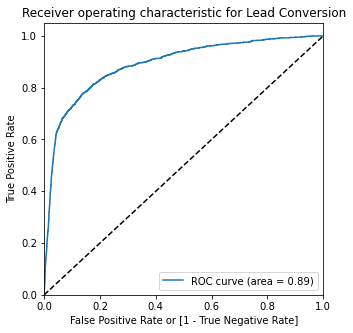

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False)

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [106]:
### Optimal Cut off

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob     ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0            0.02  16686          0    1    0    0    0    0    0   
1          0            0.41  84709          1    1    1    1    1    1    0   
2          0            0.02  33699          0    1    0    0    0    0    0   
3          0            0.00  25535          0    1    0    0    0    0    0   
4          0            0.00  49976          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.00         0.00      0.08         1.00         0.00
0.10         0.10      0.82         0.81         0.83
0.20         0.20      0.90         0.71         0.92
0.30         0.30      0.93         0.64         0.95
0.40         0.40      0.93         0.42         0.98
0.50         0.50      0.92         0.21         0.99
0.60         0.60      0.92         0.11         1.00
0.70         0.70      0.92         0.05         1.00
0.80         0.80      0.92         0.02         1.00
0.90         0.90      0.92         0.01         1.00


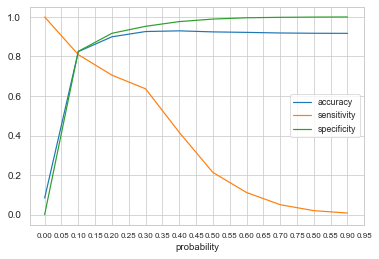

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style('whitegrid')
sns.set_context('paper')
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=10)
plt.show()

In [109]:
### Performance with Test Data
X_test.head()
X_test[num_var]=scaler.transform(X_test[num_var])


In [110]:
X_test.head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  loc_og_t2t_mou_6  \
48388    5.04        -0.60         -0.81          -0.26             -0.46   
29754   -0.55        -0.59         -0.09          -0.26             -0.43   
50131   -0.33        -0.51         -0.75          -0.25             -0.31   
66630   -0.09        -0.59          0.75          -0.26             -0.43   
91920    1.46         2.09          0.38          -0.26              5.73   

       loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_mou_6  \
48388             -0.71             -0.39             -0.32         -0.73   
29754              0.70              0.01             -0.32          0.23   
50131             -0.60             -0.39             -0.22         -0.58   
66630             -0.34             -0.39             -0.32         -0.47   
91920              1.39             -0.39             -0.32          3.80   

       std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_mou_6  \
48388             -0.44             -0.47             -0.22         -0.59   
29754             -0.44             -0.47             -0.22         -0.59   
50131             -0.41             -0.47             -0.22         -0.57   
66630             -0.44              1.18             -0.22          0.48   
91920             -0.28             -0.29             -0.22         -0.38   

       isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  roam_ic_mou_6  \
48388         -0.13         -0.44        -0.36           -0.91          -0.25   
29754         -0.13         -0.44        -0.36           -0.42          -0.25   
50131         -0.13         -0.37        -0.36           -0.82          -0.06   
66630         -0.13         -0.44        -0.36            0.16          -0.25   
91920         -0.13          0.49         2.11            1.64          -0.25   

       loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  \
48388             -0.54             -0.76             -0.42         -0.80   
29754             -0.39              1.55              1.99          1.14   
50131              0.31              0.06             -0.38          0.10   
66630             -0.14             -0.08             -0.36         -0.17   
91920              4.68              1.19             -0.04          2.65   

       std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6  \
48388             -0.34             -0.41             -0.25         -0.45   
29754             -0.28             -0.41              1.71         -0.25   
50131              0.05             -0.26             -0.08         -0.18   
66630             -0.34              8.44              0.04          8.14   
91920             -0.34             -0.18             -0.25         -0.29   

       spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
48388         -0.43         -0.22        -0.22           -0.86   
29754         -0.43          1.70        -0.22            1.09   
50131         -0.43         -0.22        -0.22           -0.01   
66630          4.77         -0.22        -0.08            2.73   
91920          1.07          0.05         0.37            2.16   

       total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
48388              -0.63             -0.09              5.24            5.53   
29754              -0.25             -0.43             -0.40            0.22   
50131               5.47              1.87             -0.34           -0.90   
66630              -0.63              1.64             -0.12           -0.65   
91920              -0.63              0.14              1.34           -0.38   

       last_day_rch_amt_6  max_rech_data_6  count_rech_2g_6  count_rech_3g_6  \
48388                7.10            -0.73            -0.52            -0.43   
29754                0.16             0.71            -0.09            -0.43   
50131               -0.59            -0.50             5.40             1.65   
66630  

In [111]:
# Choose features based on which model has been built
X_test_rfe = X_test[RFE_final_model_features]
# Add constant
X_test_sm = sm.add_constant(X_test_rfe)
# Predict
y_test_pred = res.predict(X_test_sm)

In [112]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

y_test_df['ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [113]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

Target     ID  Converted_Prob
0       0  48388            0.00
1       0  29754            0.00
2       0  50131            0.00
3       0  66630            0.07
4       0  91920            0.01

In [114]:
# y_pred_final.columns = ['ID','Converted','Converted_Prob']
# y_pred_final.head()

In [115]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > THRESHOLD else 0)

y_pred_final.head()

Target     ID  Converted_Prob  final_predicted
0       0  48388            0.00                0
1       0  29754            0.00                0
2       0  50131            0.00                0
3       0  66630            0.07                0
4       0  91920            0.01                0

In [116]:
y_test_df.head()

Target     ID
0       0  48388
1       0  29754
2       0  50131
3       0  66630
4       0  91920

In [117]:
# Let's check the overall accuracy.
log_accuracy = metrics.accuracy_score(y_pred_final.Target, y_pred_final.final_predicted).round(2)
log_recall = metrics.recall_score(y_pred_final.Target, y_pred_final.final_predicted).round(2)
print(log_accuracy)
print(log_recall)

0.83
0.83


In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final.Target, y_pred_final.final_predicted )
confusion2

array([[6866, 1439],
       [ 119,  562]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Sensitivity or Recall

log_Recall = TP / float(TP+FN)
print('Sensitivity or Recall for Test : '+str(Recall.round(2)))

# Precision
      
log_Precision = TP / float(TP+FP)
print ('Precision for Test : '+ str(Precision.round(2)))

Sensitivity or Recall for Test : 0.81
Precision for Test : 0.3


## B. High Performance Models

## 1. PCA

In [121]:
X_train.head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  loc_og_t2t_mou_6  \
16686    0.05        -0.09          0.47           5.22             -0.40   
84709    0.58         0.29          0.91          -0.26             -0.12   
33699   -1.00        -0.60         -0.73          -0.26             -0.46   
25535    1.23         3.04          0.07          -0.26              0.39   
49976   -1.11        -0.55         -0.56          -0.26             -0.35   

       loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_mou_6  \
16686             -0.43              2.36             -0.32         -0.39   
84709             -0.40             -0.14             -0.32         -0.34   
33699             -0.57             -0.39             -0.32         -0.63   
25535              0.93             -0.39             -0.32          0.78   
49976             -0.47             -0.16             -0.32         -0.51   

       std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_mou_6  \
16686             -0.03             -0.15             -0.00         -0.12   
84709              0.42              1.38              0.87          1.17   
33699             -0.44             -0.45             -0.22         -0.58   
25535              3.35             -0.39             -0.22          1.85   
49976             -0.43             -0.34             -0.22         -0.51   

       isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  roam_ic_mou_6  \
16686         -0.13         -0.44         0.19           -0.33           5.47   
84709         -0.13          0.35         1.90            0.85          -0.25   
33699         -0.13         -0.44        -0.36           -0.86          -0.25   
25535         -0.13         -0.32        -0.36            2.00          -0.25   
49976         -0.13          0.45        -0.36           -0.71          -0.25   

       loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  \
16686             -0.54             -0.13              0.01         -0.31   
84709              1.45             -0.51             -0.33          0.17   
33699              0.08             -0.49             -0.28         -0.35   
25535              0.27              0.50              0.22          0.47   
49976             -0.53             -0.61             -0.41         -0.69   

       std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6  \
16686             -0.22              0.23             -0.25          0.02   
84709              0.47              1.02              5.00          1.28   
33699             -0.34             -0.41             -0.25         -0.45   
25535             -0.23             -0.00             -0.25         -0.13   
49976             -0.18             -0.20              1.99         -0.05   

       spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_ic_mou_6  \
16686         -0.43         -0.22        -0.22           -0.30   
84709         -0.21         -0.22        -0.11            0.48   
33699         -0.43         -0.22        -0.06           -0.47   
25535         -0.43         -0.22        -0.22            0.32   
49976         -0.43         -0.22        -0.22           -0.65   

       total_rech_data_6  total_rech_num_6  total_rech_amt_6  max_rech_amt_6  \
16686              -0.63             -0.66              0.08           -0.26   
84709              -0.63              0.03              0.37           -0.38   
33699               2.80              0.37             -0.99           -0.97   
25535              -0.63              0.95              1.07            0.22   
49976               0.14             -0.66             -1.14           -0.74   

       last_day_rch_amt_6  max_rech_data_6  count_rech_2g_6  count_rech_3g_6  \
16686                0.22            -0.73            -0.52            -0.43   
84709               -0.39            -0.73            -0.52            -0.43   
33699               -0.65            -0.57             3.29            -0.43   
25535  

In [122]:
pca = PCA(random_state=42)

pca.fit(X_train)

pca.components_

array([[-1.06737712e-01, -1.14566142e-01, -1.37955286e-01, ...,
         7.26380972e-02,  7.34423775e-02,  6.53297862e-02],
       [ 1.10162998e-01, -4.43599683e-03,  3.97622625e-02, ...,
         2.42503384e-02,  2.61317705e-02,  3.50416864e-02],
       [ 8.77530094e-02,  9.68987638e-02,  5.92508387e-02, ...,
        -1.23989988e-02, -9.02850166e-03, -2.10552635e-03],
       ...,
       [ 0.00000000e+00,  5.52153189e-02, -4.19599825e-02, ...,
        -5.20417043e-17, -2.77555756e-17,  1.12757026e-16],
       [ 0.00000000e+00,  2.93839188e-02,  2.27394501e-02, ...,
         3.52148866e-16,  0.00000000e+00,  6.24500451e-17],
       [ 3.30211384e-01,  4.99600361e-16,  1.51267887e-15, ...,
        -3.55618313e-17, -7.50267903e-17, -3.66460334e-17]])

In [123]:
### Explained Variance

pca.explained_variance_ratio_

array([1.05640522e-01, 9.45623773e-02, 6.05264918e-02, 5.14303448e-02,
       4.52533294e-02, 3.56934384e-02, 2.65100464e-02, 2.61954589e-02,
       2.29056854e-02, 2.06437217e-02, 1.99430588e-02, 1.90981157e-02,
       1.74405093e-02, 1.69029380e-02, 1.59772983e-02, 1.44920480e-02,
       1.40951626e-02, 1.36931111e-02, 1.34294632e-02, 1.33618429e-02,
       1.30178282e-02, 1.27380385e-02, 1.15340535e-02, 1.07856787e-02,
       1.01620377e-02, 1.00354843e-02, 9.67773320e-03, 9.46848156e-03,
       8.89299031e-03, 8.79686522e-03, 8.19426871e-03, 8.08710507e-03,
       7.93989678e-03, 7.67968635e-03, 7.53500650e-03, 7.30335117e-03,
       7.08178408e-03, 6.73476779e-03, 6.59159928e-03, 6.26251563e-03,
       6.08205866e-03, 6.01243242e-03, 5.72431916e-03, 5.55128638e-03,
       5.44700285e-03, 5.05905598e-03, 4.91117567e-03, 4.80739839e-03,
       4.77194103e-03, 4.62763860e-03, 4.50526240e-03, 4.33705585e-03,
       4.19145485e-03, 4.16017865e-03, 3.90562899e-03, 3.80252764e-03,
      

In [124]:
## Scree Plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)

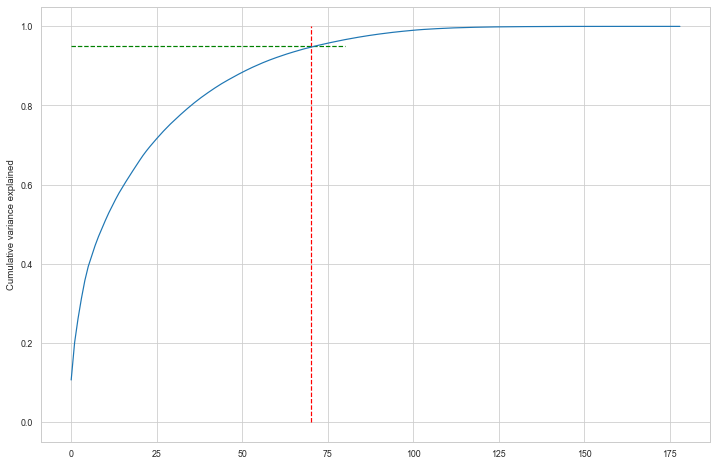

In [125]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Lets Check un-supervised way - howmany components are required for explaining 95% variance

In [126]:
pca_unsupervised = PCA(0.95)

In [127]:
df_train_pca_unsup = pca_unsupervised.fit_transform(X_train)

In [128]:
df_train_pca_unsup.shape

(20967, 73)

In [129]:
df_test_pca_unsup = pca_unsupervised.transform(X_test)
df_test_pca_unsup.shape

(8986, 73)

## 2. Logistic Regression with PCA

In [130]:
# Build logistic regression model with balanced class weight
logreg_pca = LogisticRegression(class_weight = 'balanced')

# Fit a logistic regression model with Train data leveraging PCA components
model_logreg_pca = logreg_pca.fit(df_train_pca_unsup, y_train)

# Transform Test records with PCA
df_test_pca_unsup = pca_unsupervised.transform(X_test)

# Predict for Test using logistic regression model
pred_probs_test = model_logreg_pca.predict_proba(df_test_pca_unsup)[:,1]

# Print AUC for Logistic Regression Model with PCA i.e 73 variables
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))



'0.9'

#### hyper-parameter Tuning

In [131]:
pca_normal = PCA()

# create pipeline
steps = [("pca", pca_normal),
         ("logistic", logreg_pca)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 70, 80],
          'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5],
          'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [132]:
# fit model
model.fit(X_train, y_train)

# print best hyperparameters
print("Best Recall: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.6min finished


Best Recall:  0.8327602767602768
Best hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [133]:
# predict churn on test data
y_pred_log_pca = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_log_pca)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_log_pca, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob_log_pca = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob_log_pca),2))

[[6647 1658]
 [ 104  577]]
Sensitivity: 	0.85
Specificity: 	0.8
AUC:    	 0.9


## 3. Decision Tree with PCA

In [134]:
# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5, class_weight = 'balanced')

# So work with limited compute - lets build DT on RFE features we sourced earlier
dt1.fit(df_train_pca_unsup, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [135]:
# Predict for test 
y_pred_dt1 = dt1.predict(df_test_pca_unsup)

# classification report
print(classification_report(y_test, y_pred_dt1))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8305
           1       0.30      0.74      0.43       681

    accuracy                           0.85      8986
   macro avg       0.64      0.80      0.67      8986
weighted avg       0.93      0.85      0.88      8986



In [136]:
# confusion matrix
print(confusion_matrix(y_test,y_pred_dt1))

# accuracy of the decision tree
print('Decision Tree - Accuracy :',metrics.accuracy_score(y_test,y_pred_dt1))
print('Decision Tree - Recall :',metrics.recall_score(y_test,y_pred_dt1))
print('Decision Tree - F1 Score :',metrics.f1_score(y_test,y_pred_dt1))

[[7132 1173]
 [ 174  507]]
Decision Tree - Accuracy : 0.8501001557979079
Decision Tree - Recall : 0.7444933920704846
Decision Tree - F1 Score : 0.4294790343074968


#### hyper-parameter tuning for Decision Tree

In [137]:
# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'max_depth': range(3, 15)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced',
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True)
tree.fit(df_train_pca_unsup, y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(3, 15)}, return_train_score=True,
             scoring='recall')

In [138]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.36          0.01             0.00            0.00   
1           0.46          0.01             0.00            0.00   
2           0.55          0.01             0.00            0.00   
3           0.67          0.02             0.00            0.00   
4           0.73          0.01             0.00            0.00   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               3  {'max_depth': 3}               0.70               0.73   
1               4  {'max_depth': 4}               0.74               0.69   
2               5  {'max_depth': 5}               0.71               0.74   
3               6  {'max_depth': 6}               0.75               0.75   
4               7  {'max_depth': 7}               0.71               0.76   

   split2_test_score  split3_test_score  mean_test_score  std_test_score  \
0               0.71               0.72             0.72            0.01   
1               0.74               0.72             0.72            0.02   
2               0.70               0.72             0.72            0.02   
3               0.70               0.73             0.73            0.02   
4               0.68               0.73             0.72            0.03   

   rank_test_score  split0_train_score  split1_train_score  \
0                5                0.73                0.73   
1                2                0.76                0.71   
2                4                0.80                0.81   
3                1                0.86                0.84   
4                2                0.88                0.91   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0                0.75                0.74              0.74             0.01  
1                0.80                0.76              0.76             0.03  
2                0.80                0.80              0.80             0.01  
3                0.83                0.83              0.84             0.01  
4                0.88                0.88              0.89             0.01

#### Depth of 6 seems to be the most optimal, per above results

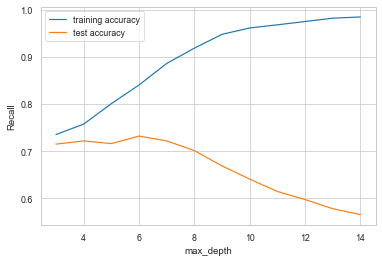

In [139]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [140]:
# fine-tuning minimum sample leaf

# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'min_samples_leaf': range(70, 160, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced',
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True)
tree.fit(df_train_pca_unsup, y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(70, 160, 20)},
             return_train_score=True, scoring='recall')

In [141]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.96          0.05             0.00            0.00   
1           0.91          0.06             0.00            0.00   
2           0.89          0.04             0.00            0.00   
3           0.87          0.06             0.00            0.00   
4           0.87          0.07             0.00            0.00   

  param_min_samples_leaf                     params  split0_test_score  \
0                     70   {'min_samples_leaf': 70}               0.74   
1                     90   {'min_samples_leaf': 90}               0.75   
2                    110  {'min_samples_leaf': 110}               0.79   
3                    130  {'min_samples_leaf': 130}               0.78   
4                    150  {'min_samples_leaf': 150}               0.77   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0               0.76               0.71               0.77             0.75   
1               0.79               0.74               0.76             0.76   
2               0.80               0.74               0.78             0.78   
3               0.79               0.73               0.78             0.77   
4               0.79               0.75               0.78             0.77   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0            0.02                5                0.89                0.89   
1            0.02                4                0.87                0.89   
2            0.02                1                0.89                0.87   
3            0.02                3                0.86                0.86   
4            0.02                2                0.84                0.83   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0                0.90                0.90              0.89             0.00  
1                0.89                0.88              0.88             0.01  
2                0.85                0.88              0.87             0.02  
3                0.85                0.87              0.86             0.01  
4                0.84                0.84              0.84             0.00

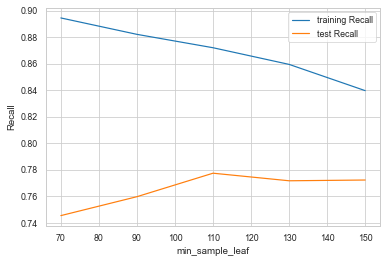

In [142]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training Recall")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test Recall")
plt.xlabel("min_sample_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

#### min_sample_leaf ~150 seems to be the optimal one

In [143]:
# fine tune min samples split

# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'min_samples_split': range(60, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                   return_train_score=True)
tree.fit(df_train_pca_unsup, y_train)


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_split': range(60, 200, 20)},
             return_train_score=True, scoring='recall')

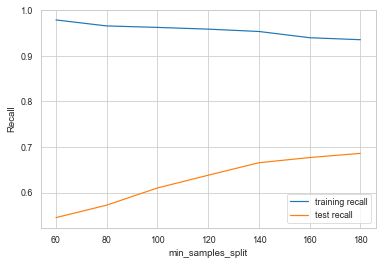

In [144]:
# scores of GridSearch CV
scores = tree.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

# min_samples_split=180 seems to be optimal

In [145]:
# Create the parameter grid for consolidated Fine Tuning
param_grid = {
    'max_depth': range(4, 8, 1),
    'min_samples_leaf': range(110, 190, 20),
    'min_samples_split': range(140, 220, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 4

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, n_jobs=-1, scoring="recall",
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca_unsup, y_train)

Fitting 4 folds for each of 128 candidates, totalling 512 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:  1.5min finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(4, 8),
                         'min_samples_leaf': range(110, 190, 20),
                         'min_samples_split': range(140, 220, 20)},
             scoring='recall', verbose=1)

In [146]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Recall", grid_search.best_score_)

Best Recall 0.797945205479452


In [147]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=170,
                       min_samples_split=140)


#### Final Model with Optimal parameters

In [148]:
# model with optimal hyperparameters
final_pca_DT = DecisionTreeClassifier(criterion = "entropy",
                                  class_weight='balanced',
                                  random_state = 100,
                                  max_depth=7, 
                                  min_samples_leaf=170,
                                  min_samples_split=200)
final_pca_DT.fit(df_train_pca_unsup, y_train)

# Predict for test 
y_pred_dt_final = final_pca_DT.predict(df_test_pca_unsup)

# classification report
print(classification_report(y_test, y_pred_dt_final))

# Performance
print('Hyperparameter tuned Decision Tree - Accuracy :',metrics.accuracy_score(y_test,y_pred_dt_final))
print('Hyperparameter tuned Decision Tree - Recall :',metrics.recall_score(y_test,y_pred_dt_final))
print('Hyperparameter tuned Decision Tree - F1 Score :',metrics.f1_score(y_test,y_pred_dt_final))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      8305
           1       0.24      0.80      0.37       681

    accuracy                           0.79      8986
   macro avg       0.61      0.80      0.62      8986
weighted avg       0.92      0.79      0.84      8986

Hyperparameter tuned Decision Tree - Accuracy : 0.7943467616292009
Hyperparameter tuned Decision Tree - Recall : 0.7973568281938326
Hyperparameter tuned Decision Tree - F1 Score : 0.37014314928425357


## 4. Random Forest with PCA

In [149]:
# Lets start off with simple Random Forest without any fine tuning
simple_RF = RandomForestClassifier(class_weight='balanced')
simple_RF.fit(df_train_pca_unsup, y_train)

# Make predictions
prediction_test = simple_RF.predict(df_test_pca_unsup)
print ('Random Forest Accuracy with Default Hyperparameter :',metrics.accuracy_score(y_test, prediction_test))
print('Random Forest Recall with Default Hyperparameter :',metrics.recall_score(y_test,prediction_test))
print('Random Forest F1-Score with Default Hyperparameter :',metrics.f1_score(y_test,prediction_test))

Random Forest Accuracy with Default Hyperparameter : 0.9277765412864456
Random Forest Recall with Default Hyperparameter : 0.14831130690161526
Random Forest F1-Score with Default Hyperparameter : 0.23736780258519388


In [150]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8305
           1       0.59      0.15      0.24       681

    accuracy                           0.93      8986
   macro avg       0.76      0.57      0.60      8986
weighted avg       0.91      0.93      0.91      8986



In [151]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[8236   69]
 [ 580  101]]


In [152]:
#### Hyper-parameter tuning

# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                  return_train_score=True)
rf.fit(df_train_pca_unsup, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='recall')

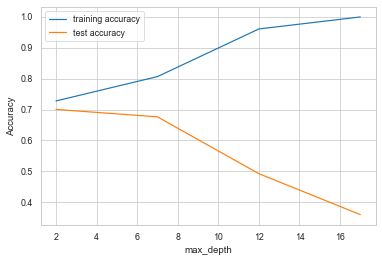

In [153]:
# plotting accuracies with max_depth
scores = rf.cv_results_

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Max Depth of 7 seems optimal

In [154]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators

## specify number of folds for k-fold CV
n_folds = 4

## parameters to build the model on
parameters = {'n_estimators': range(20, 300, 50)}

## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7, class_weight='balanced')

## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   n_jobs=-1,
                   scoring="recall",
                  return_train_score=True)

rf.fit(df_train_pca_unsup, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=7),
             n_jobs=-1, param_grid={'n_estimators': range(20, 300, 50)},
             return_train_score=True, scoring='recall')

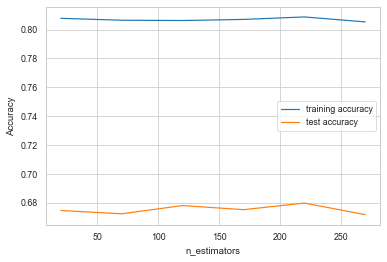

In [155]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Looks like 120 is a good option

In [156]:
# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'min_samples_leaf': range(250, 510, 50)}

## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7, n_estimators=120, class_weight='balanced')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                  return_train_score=True)
rf.fit(df_train_pca_unsup, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=7, n_estimators=120),
             param_grid={'min_samples_leaf': range(250, 510, 50)},
             return_train_score=True, scoring='recall')

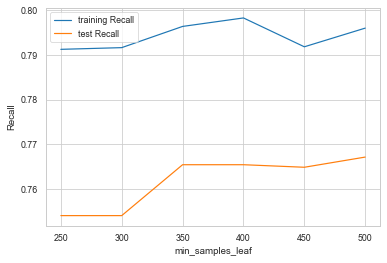

In [157]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training Recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test Recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

#### min_samples_leaf=400 seems to be a good choice

In [158]:
# fine tuning min samples split
# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier(max_depth=7, n_estimators=120, min_samples_leaf=400, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                   cv=n_folds, 
                   scoring="recall",
                   n_jobs=-1,
                   return_train_score=True)
rf.fit(df_train_pca_unsup, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=7, min_samples_leaf=400,
                                              n_estimators=120),
             n_jobs=-1, param_grid={'min_samples_split': range(100, 500, 25)},
             return_train_score=True, scoring='recall')

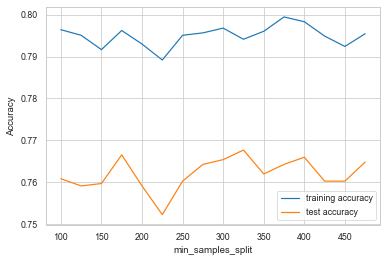

In [159]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### min_samples_split=300 is the optimal value

#### Consolidated Hyper parameter Tuning for Random Forest

In [160]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7, 8],
    'min_samples_leaf': [500, 600],
    'min_samples_split': [300],
    'n_estimators': [120], 
    'max_features': [30, 60]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring="recall",
                          cv = 3, n_jobs = -1,verbose = 1)

# fit the grid search with the data
grid_search.fit(df_train_pca_unsup, y_train)

# optimal accuracy score and hyperparameters
print('Recall is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.8min finished


Recall is 0.7836757990867579 using {'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 600, 'min_samples_split': 300, 'n_estimators': 120}


In [161]:
final_model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=7,
                                 class_weight='balanced',
                                  min_samples_leaf=600, 
                                  min_samples_split=300,
                                  n_estimators=120 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 30)

final_model_rf.fit(df_train_pca_unsup, y_train)

# Make predictions
prediction_test_rf = final_model_rf.predict(df_test_pca_unsup)

print(classification_report(y_test,prediction_test_rf))
print(confusion_matrix(y_test,prediction_test_rf))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8305
           1       0.25      0.81      0.38       681

    accuracy                           0.80      8986
   macro avg       0.62      0.81      0.63      8986
weighted avg       0.93      0.80      0.84      8986

[[6665 1640]
 [ 130  551]]


In [162]:
# Performance of final RF model
print ('Final Random Forest Accuracy with Hyperparameter fine tuning :',metrics.accuracy_score(y_test, prediction_test_rf))
print('Final Random Forest Recall with Hyperparameter fine tuning  :',metrics.recall_score(y_test,prediction_test_rf))
print('Final Random Forest F1-Score with Hyperparameter fine tuning  :',metrics.f1_score(y_test,prediction_test_rf))

Final Random Forest Accuracy with Hyperparameter fine tuning : 0.8030269307812152
Final Random Forest Recall with Hyperparameter fine tuning  : 0.8091042584434655
Final Random Forest F1-Score with Hyperparameter fine tuning  : 0.38370473537604455


# Results, Conclusions & Recommendations

In [164]:
print("----------- Top Contributors for Interpretable Model (Logistic with RFE)------------------")
print(top_contributors)
print("----------- Performance for Interpretable Model (Logistic with RFE)------------------")
print('Accuracy with Vanilla Logistic regression: '+str(log_accuracy))
print('Recall with Vanilla Logistic regression : '+str(log_recall))
print("----------- Results for Logistic with PCA----------------------")
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob_log_pca),2))
print("----------- Results for hypertuned Decision Tree with PCA----------------------")
print('Hyperparameter tuned Decision Tree - Accuracy :',metrics.accuracy_score(y_test,y_pred_dt_final).round(2))
print('Hyperparameter tuned Decision Tree - Recall :',metrics.recall_score(y_test,y_pred_dt_final).round(2))
print('Hyperparameter tuned Decision Tree - F1 Score :',metrics.f1_score(y_test,y_pred_dt_final).round(2))
print("----------- Results for hypertuned Random Forest with PCA----------------------")
print ('Final Random Forest Accuracy with Hyperparameter fine tuning :',metrics.accuracy_score(y_test, prediction_test_rf).round(2))
print('Final Random Forest Recall with Hyperparameter fine tuning  :',metrics.recall_score(y_test,prediction_test_rf).round(2))
print('Final Random Forest F1-Score with Hyperparameter fine tuning  :',metrics.f1_score(y_test,prediction_test_rf).round(2))

----------- Top Contributors for Interpretable Model (Logistic with RFE)------------------
loc_ic_mou_8          -2.97
fb_user_8_1.0         -1.12
sep_vbc_3g            -1.06
spl_ic_mou_8          -0.81
loc_ic_t2m_mou_7       0.62
std_og_t2t_mou_8      -0.55
total_og_mou_6        -0.50
last_day_rch_amt_8    -0.46
offnet_mou_diff       -0.45
total_rech_data_8     -0.45
std_og_t2t_mou_6       0.35
good_phase_rech_amt    0.29
loc_og_t2m_mou_7      -0.27
dtype: float64
----------- Performance for Interpretable Model (Logistic with RFE)------------------
Accuracy with Vanilla Logistic regression: 0.83
Recall with Vanilla Logistic regression : 0.83
----------- Results for Logistic with PCA----------------------
Sensitivity: 	0.85
Specificity: 	0.8
AUC:    	 0.9
----------- Results for hypertuned Decision Tree with PCA----------------------
Hyperparameter tuned Decision Tree - Accuracy : 0.79
Hyperparameter tuned Decision Tree - Recall : 0.8
Hyperparameter tuned Decision Tree - F1 Score : 0.3

# Recommendations interpreting top contributors:
- factors like incoming call units, data usage (ex: FB Services) in trouble phase i.e Aug play an impotant role
- From the Good phase - toal rechanrge amount, total outgoing calls, specially the std ones are important indicators

- The company must consider leveraging this moedl to identify potential churn and address them through focused marketing
- Given the above signals the company should focus on data pricing and free packs for targeted users during trouble phase
- People using STD calls more need to be paid attention and perhaps that needs to be competitively prices as cost for STD calls generally tend to be higher from mobile
- People also using services for T2T predominantly, should be watched out and pleased with offers
